Лабораторная работа №3. Выполнила Андрющенко К.С.

In [30]:
import numpy as np
import random
from collections import deque
import seaborn as sns
import pandas as pd

Условия

Лес состоит из пустой сетки $N \times N$


```
def create_forest(size):
    return np.zeros((size, size), dtype=int)
```
Случайным образом выбирается участок леса


```
x, y = random.randint(0, size - 1), random.randint(0, size - 1)
```
Вероятность (*tree_growth_prob*) вырасти дереву (пустой участок) и загореться дереву (не пустой участок)

```
# возможность вырасти дереву
if forest[x, y] == 0:
    grow_tree(forest, x, y, tree_growth_prob)
# возможность загореться дереву
elif forest[x, y] == 1:
    fire_size = ignite_tree(forest, x, y, 1 - tree_growth_prob)
```
Если дерево горит, то огонь распространяется на соседние клетки, размер пожара увеличивается

```
fire_size += 1
# проверка соседних клеток
for dx, dy in [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1)-1), (1, 0), (1, 1)]:
    nx, ny = cx + dx, cy + dy
    if 0 <= nx < size and 0 <= ny < size and forest[nx, ny] == 1:
        queue.append((nx, ny))
```






In [31]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from collections import deque

Модель лесного пожара без важного уточнения (оно в следующем пункте)

In [32]:
def create_forest(size):
    return np.zeros((size, size), dtype=int)

def grow_tree(forest, x, y, growth_prob):
    # дерево растет
    if random.random() < growth_prob:
        forest[x, y] = 1  # Дерево растет
    # дерево горит
def ignite_tree(forest, x, y, lightning_prob):
    if random.random() < lightning_prob:
        return spread_fire(forest, x, y)
    return 0

def spread_fire(forest, x, y):
    size = forest.shape[0]
    queue = deque([(x, y)])
    fire_size = 0
    while queue:
        cx, cy = queue.popleft()
        if forest[cx, cy] == 1:  # Если на клетке дерево
            forest[cx, cy] = 2  # Дерево горит
            fire_size += 1
            # проверка соседних клеток
            for dx, dy in [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]:
                nx, ny = cx + dx, cy + dy
                if 0 <= nx < size and 0 <= ny < size and forest[nx, ny] == 1:
                    queue.append((nx, ny))
    return fire_size

def visualize_forest(forest):
    # визуализация
    plt.figure(figsize=(6, 6))
    colors = {
        0: "white",  # пустота
        1: "green",  # деревья
        2: "orange"  # горящие деревья
    }
    # цветовая карта леса
    forest_colored = np.full(forest.shape, "white", dtype=object)
    for x in range(forest.shape[0]):
        for y in range(forest.shape[1]):
            if forest[x, y] == 1:
                forest_colored[x, y] = "green"  # деревья
            elif forest[x, y] == 2:
                forest_colored[x, y] = "orange"  # горящие деревья
    # лес
    sns.heatmap(forest_colored == "green", cmap=["white", "green"], linewidths=0.5, linecolor="gray", cbar=False)
    sns.heatmap(forest_colored == "orange", cmap=["white", "orange"], linewidths=0.5, linecolor="gray", cbar=False, alpha=0.7)
    plt.title("Лесной пожар (оранжевый — огонь, зеленый — деревья, белый - ничего)")
    plt.xticks([])
    plt.yticks([])
    plt.show()

def simulate_fire(size, tree_growth_prob, steps, visualize_forest_need=True):
    # модель распространения огня
    forest = create_forest(size)
    fire_sizes = []
    green_tree_counts = []  # массив для хранения зеленого леса который растет
    for step in range(steps):
        x, y = random.randint(0, size - 1), random.randint(0, size - 1)
        # возможность вырасти дереву
        if forest[x, y] == 0:
            grow_tree(forest, x, y, tree_growth_prob)
        # возможность загореться дереву
        elif forest[x, y] == 1:
            fire_size = ignite_tree(forest, x, y, 1 - tree_growth_prob)
            if fire_size > 0:
                fire_sizes.append(fire_size)
                forest[x, y] = 3  # молния

        # каждые 10 шагов считаем количество зеленых деревьев
        if step % 10 == 0:
            green_tree_count = np.sum(forest == 1)  # Количество клеток со значением 1 (зелёные деревья)
            green_tree_counts.append(green_tree_count)

        if visualize_forest_need is True:
          # каждые 100 итераций вывод картинки
          if step % 100 == 0:
              visualize_forest(forest)
              # молния ударила дерево горит
              forest[forest == 3] = 2
    return forest, fire_sizes, green_tree_counts

In [33]:
size = 100  # размер сетки
tree_growth_prob = 0.5  # вероятность
steps = 15000  # шагов моделирования

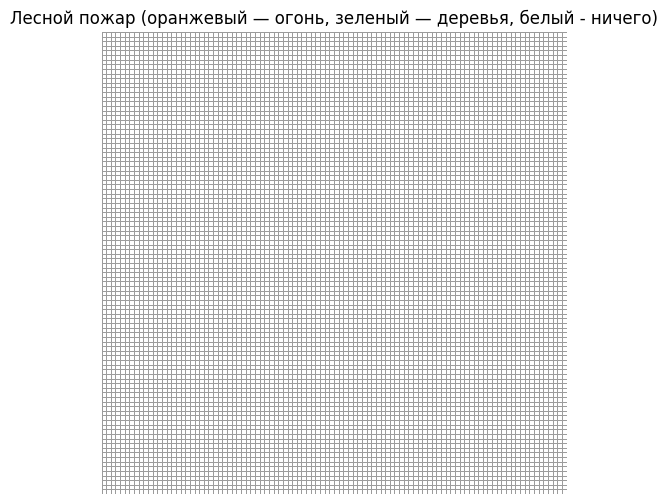

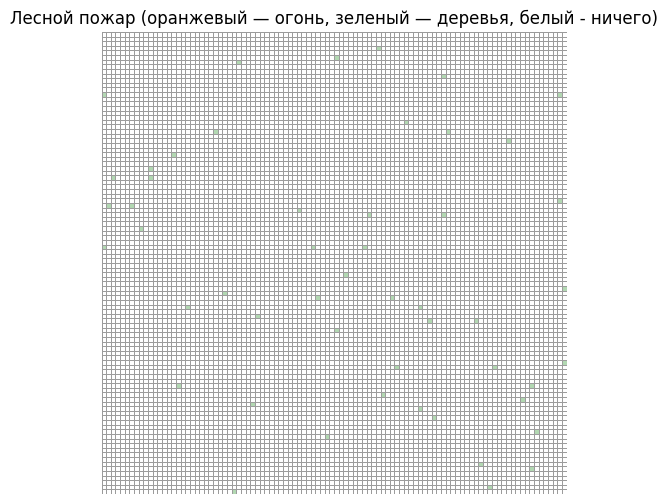

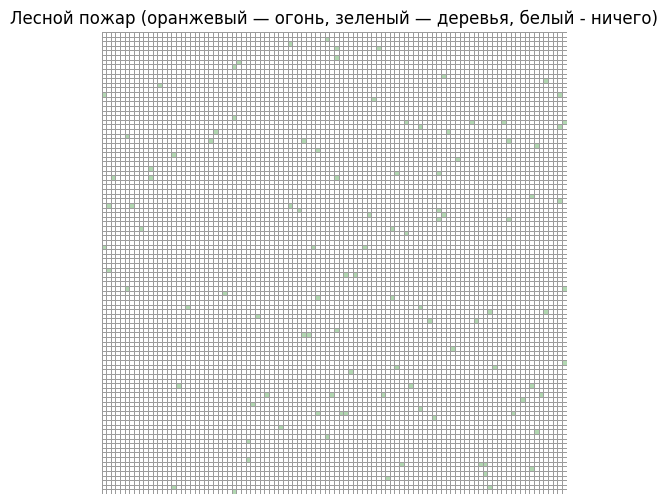

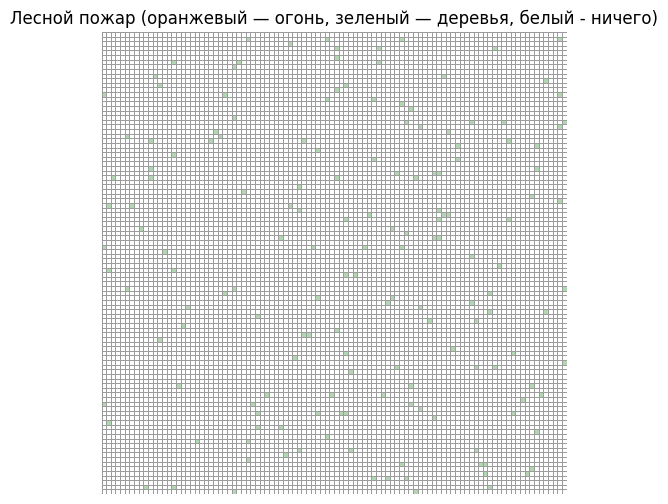

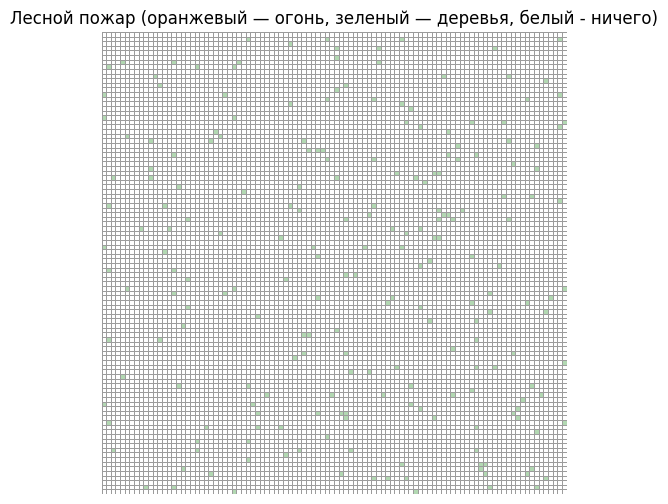

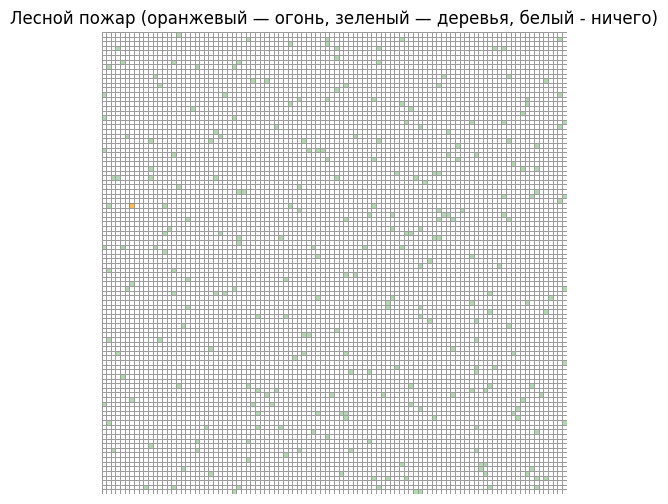

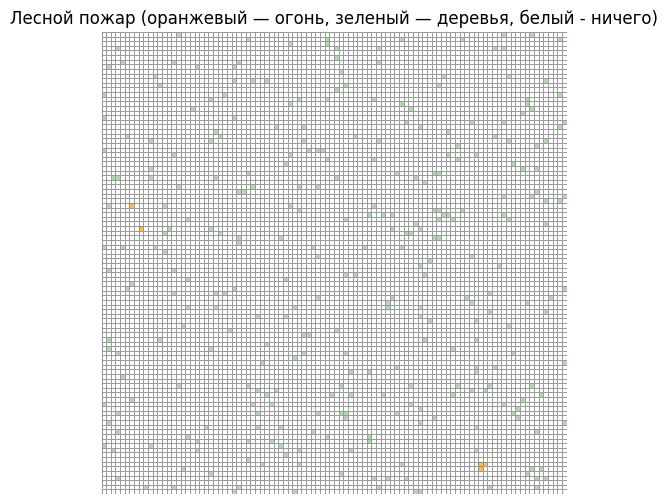

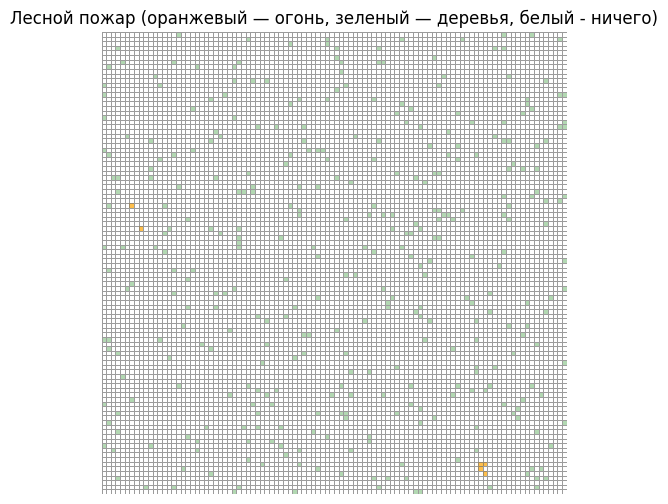

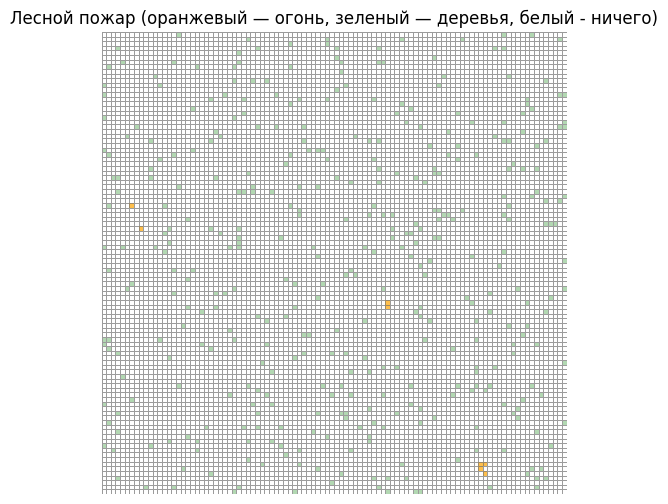

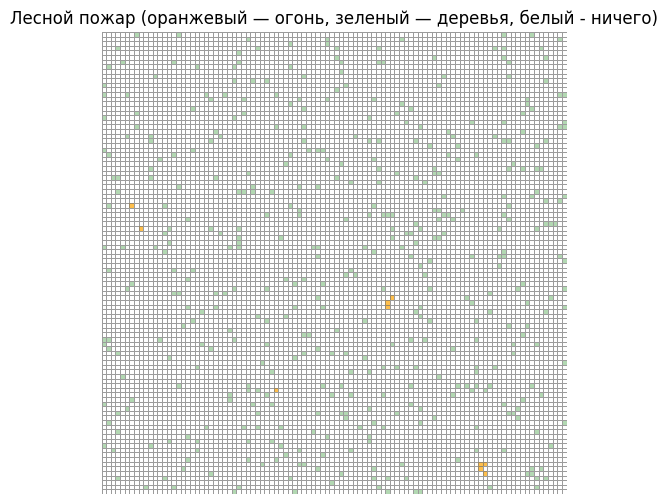

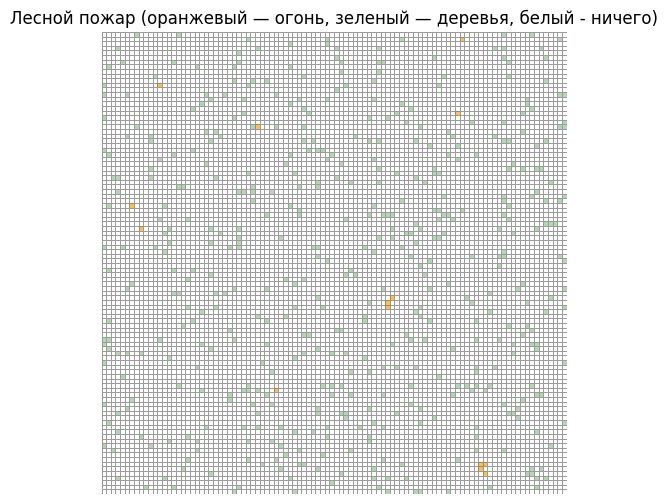

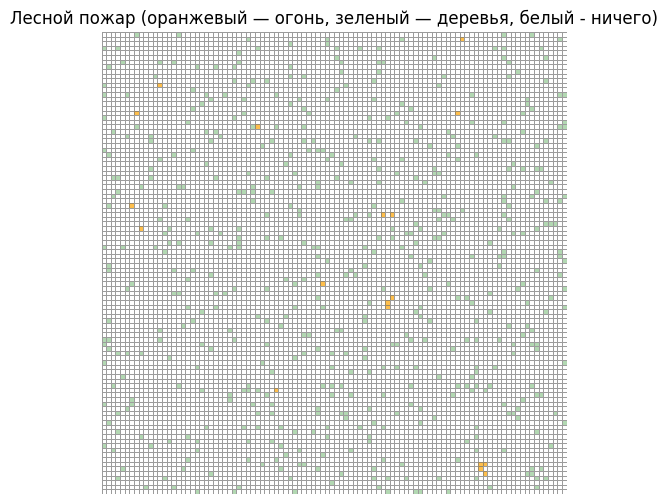

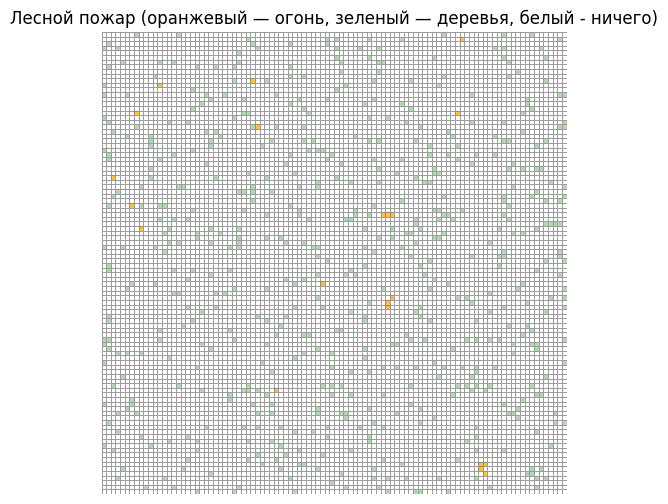

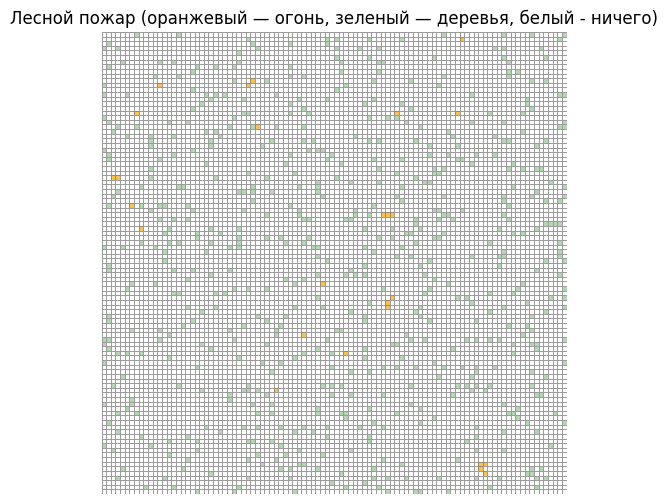

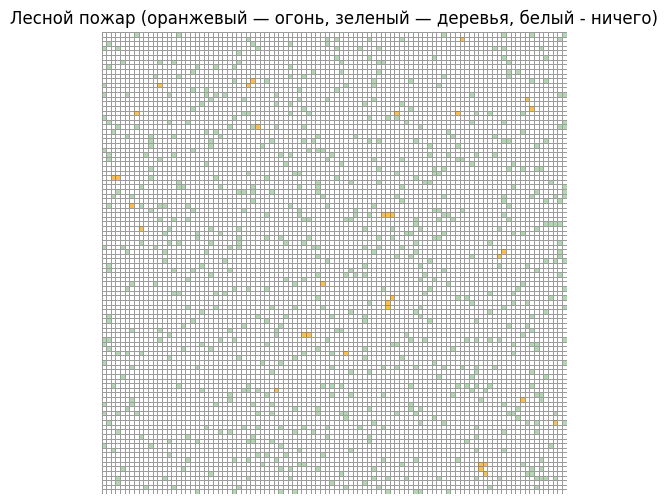

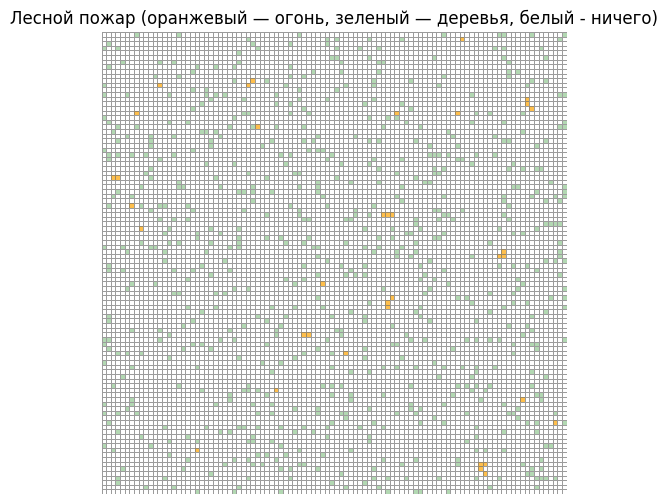

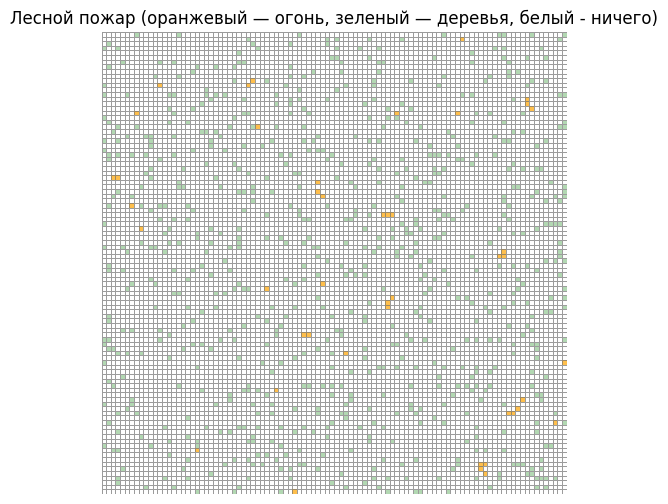

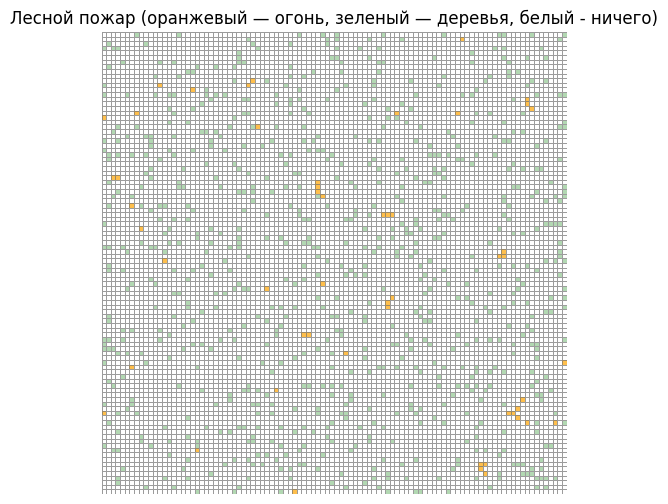

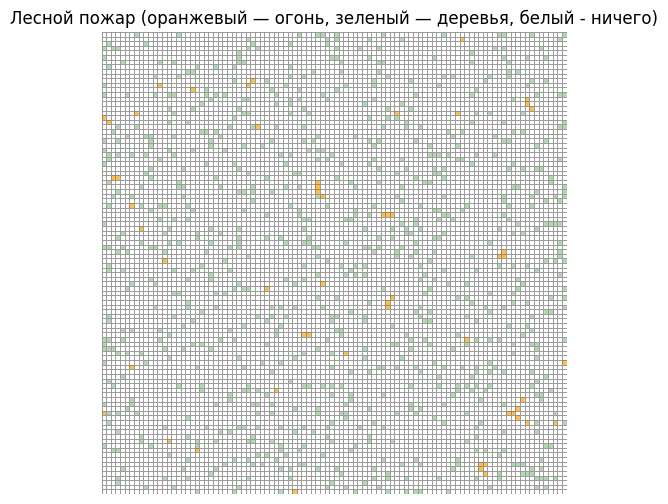

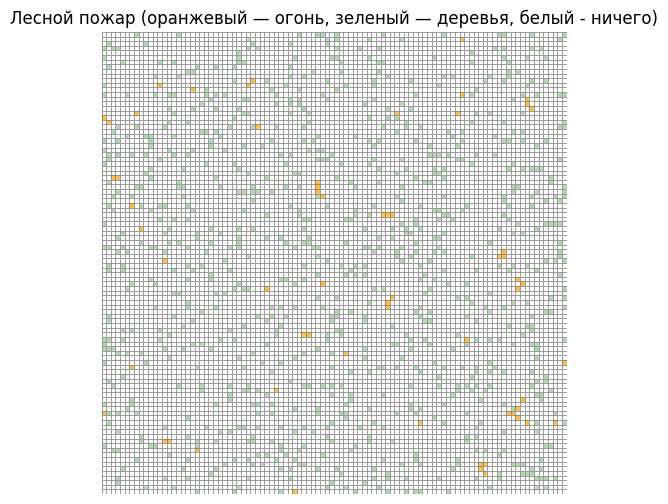

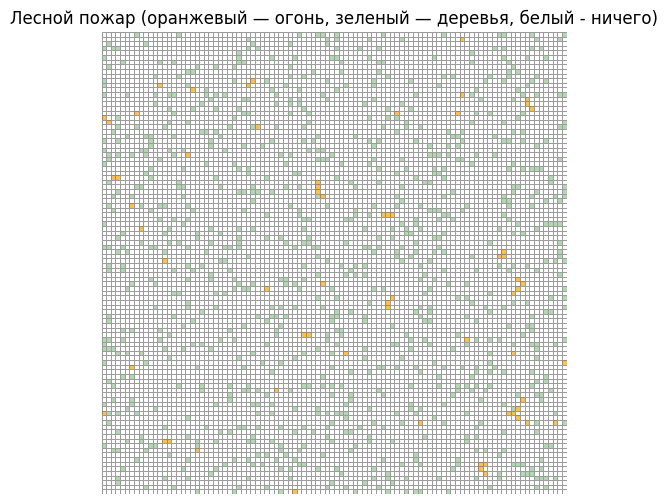

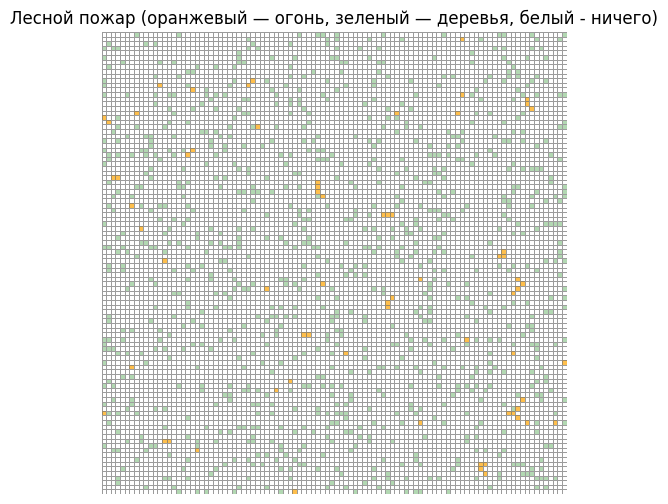

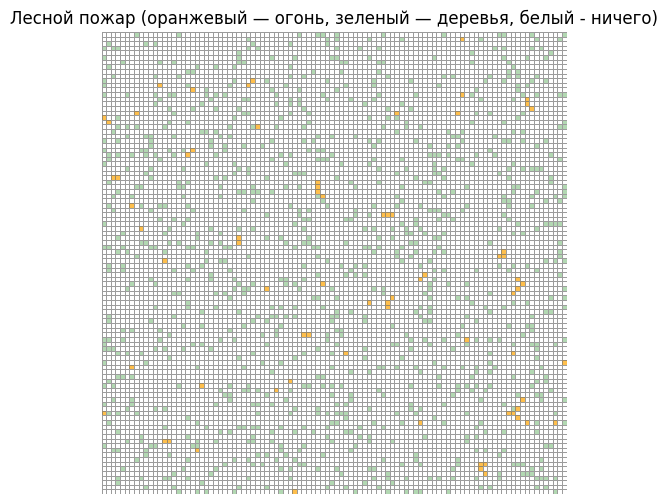

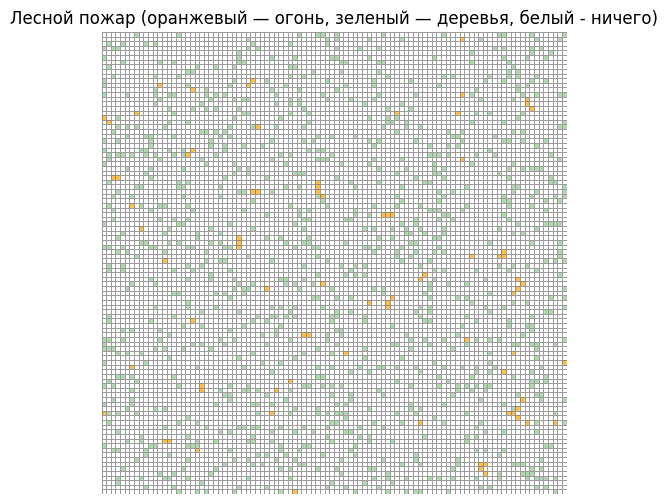

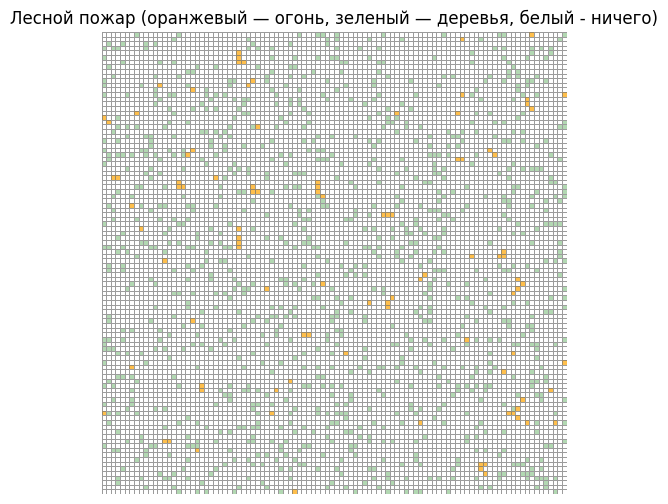

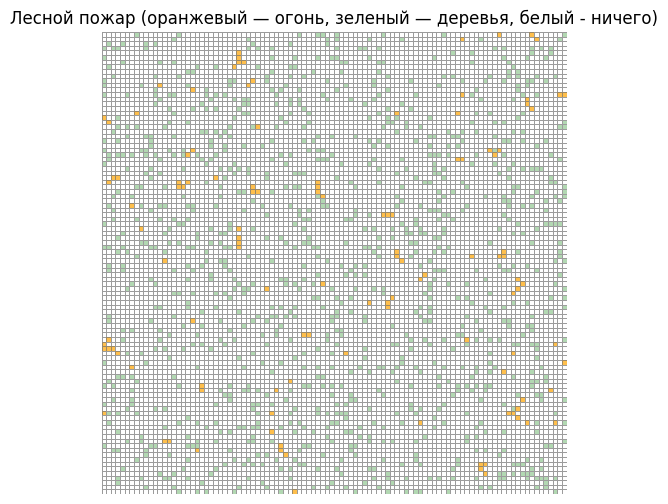

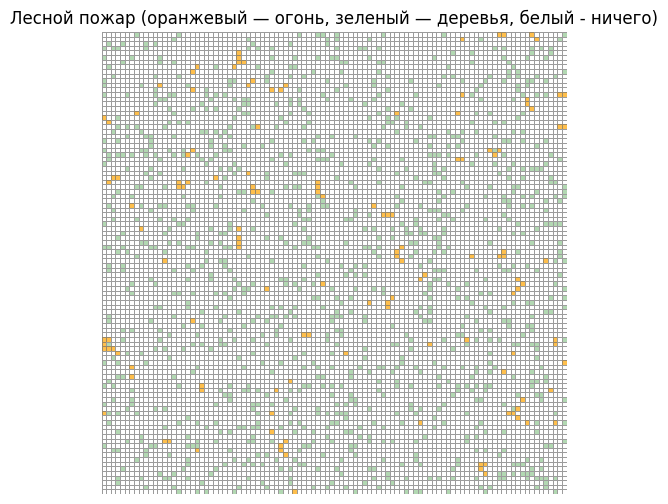

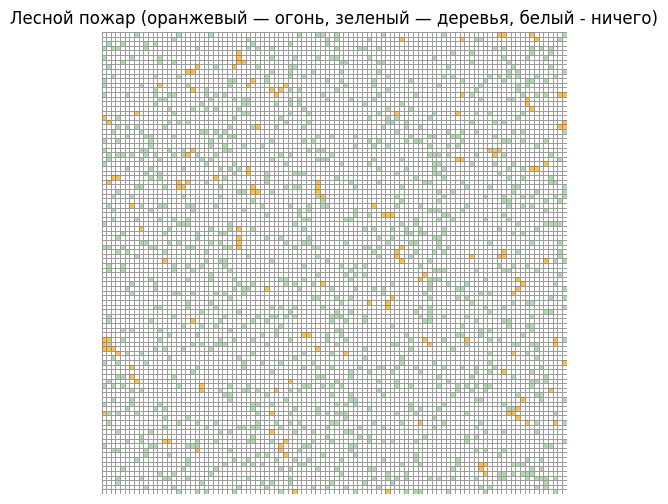

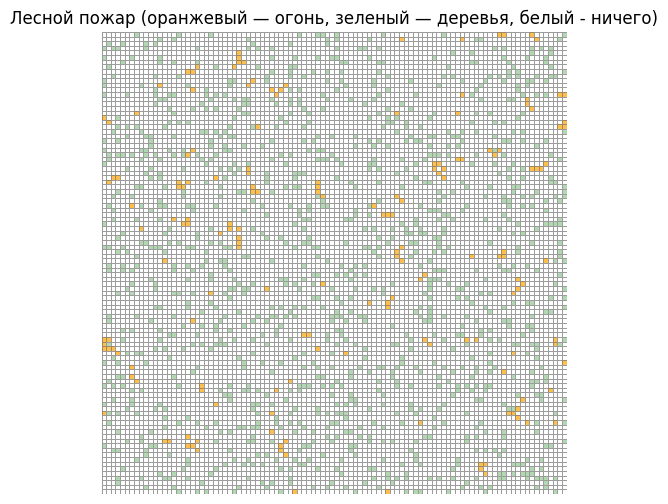

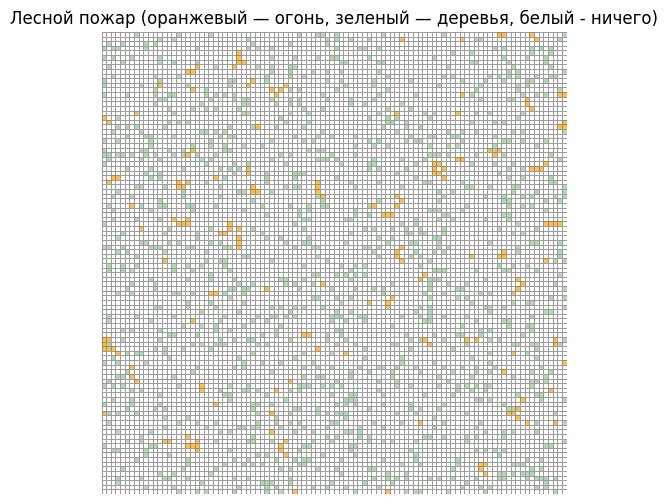

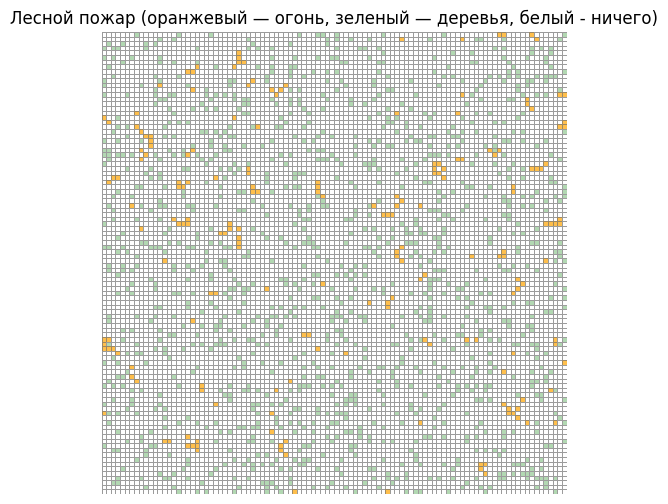

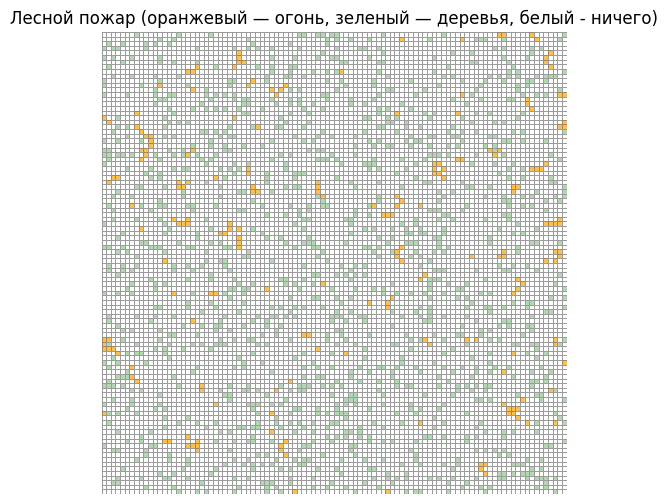

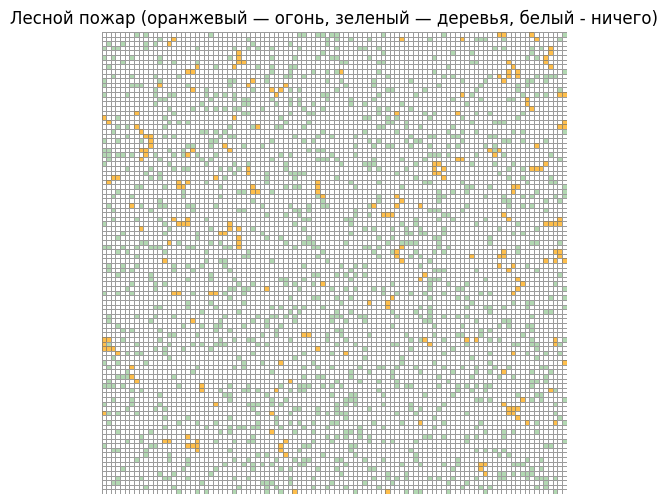

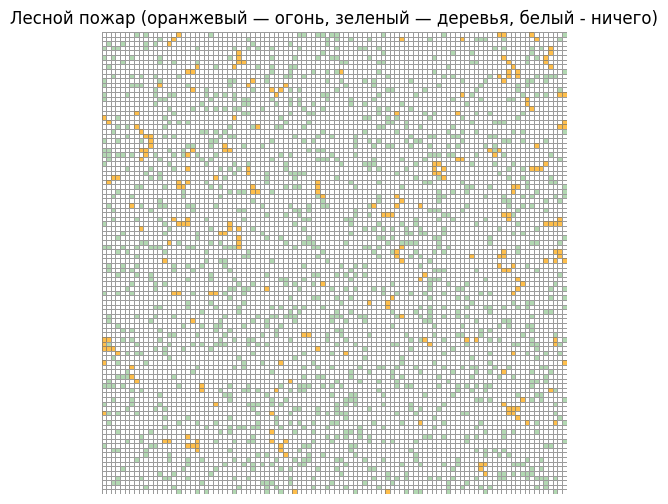

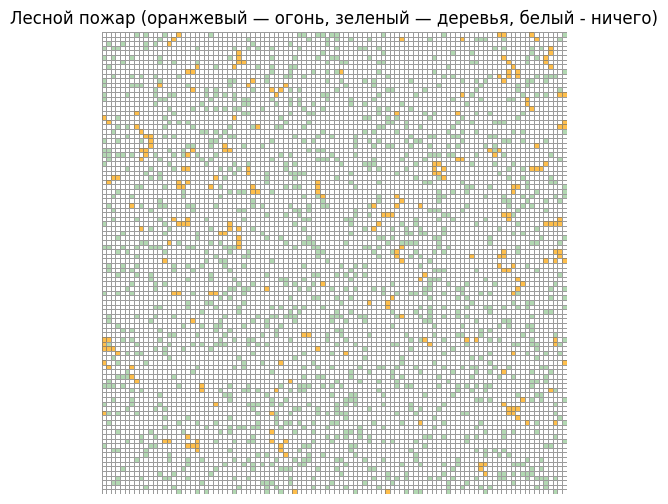

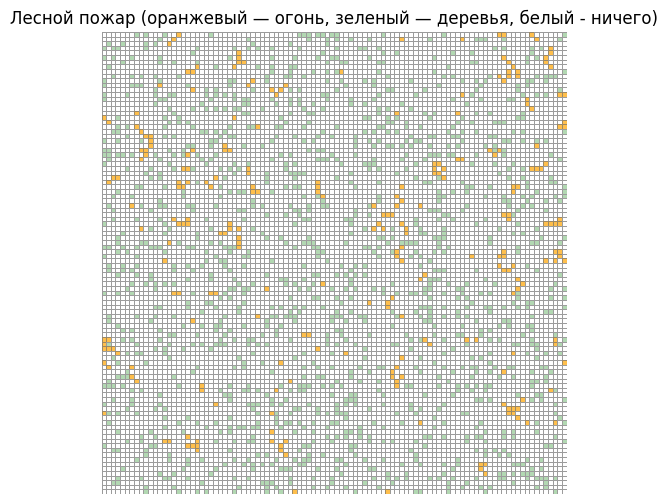

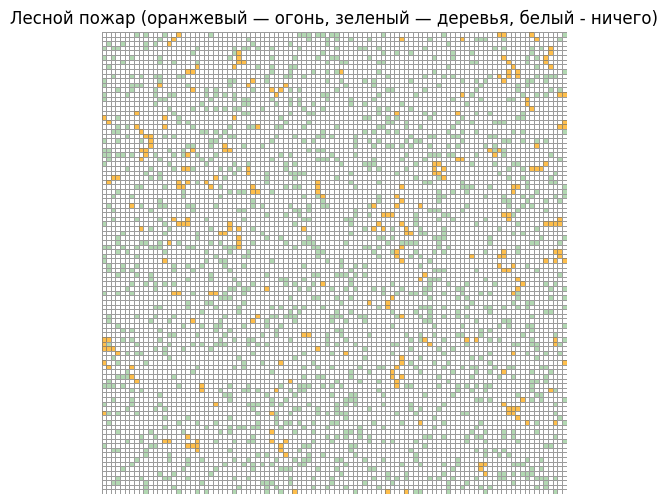

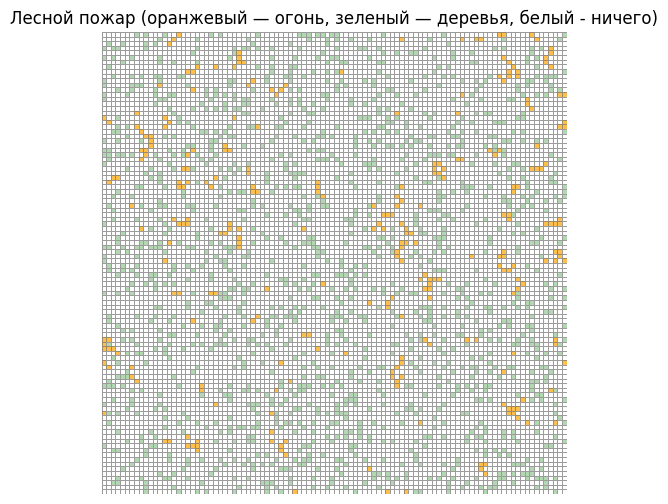

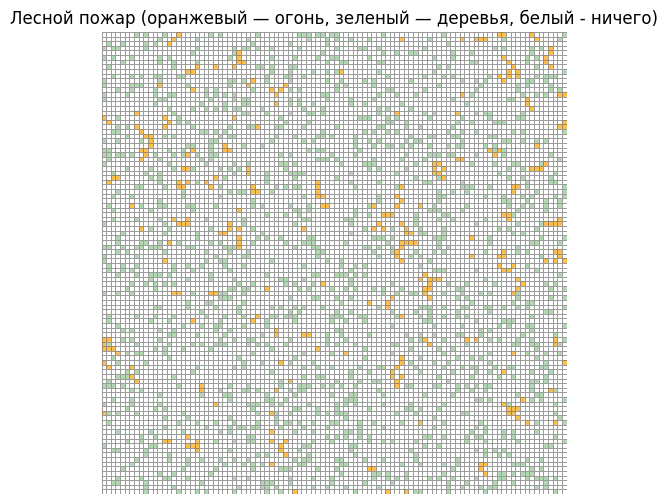

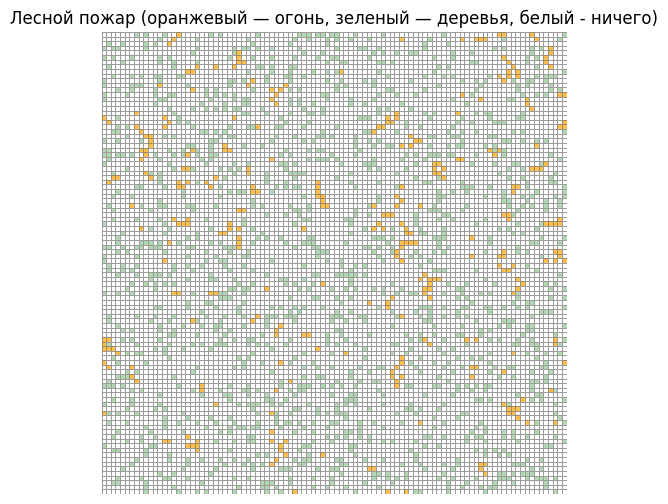

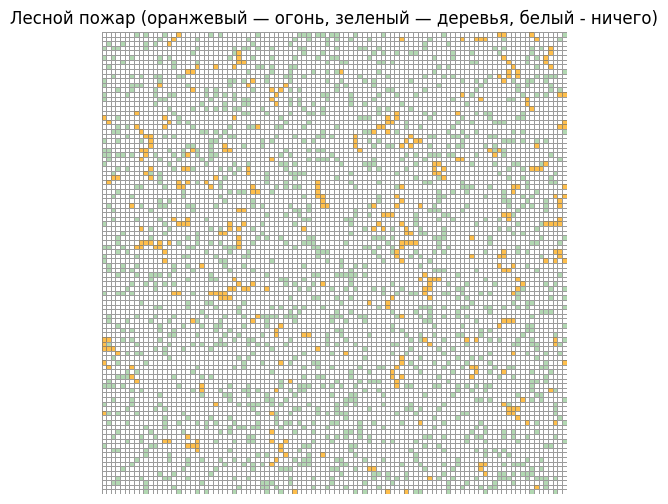

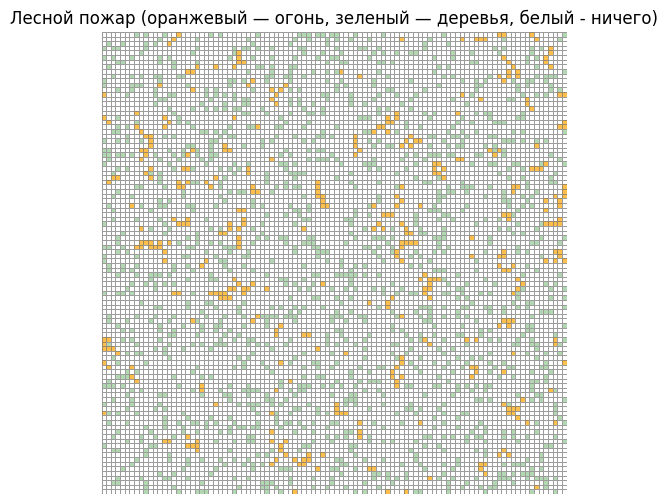

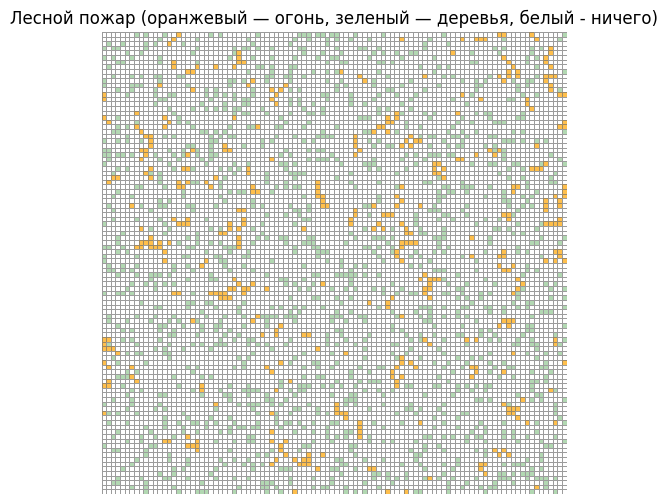

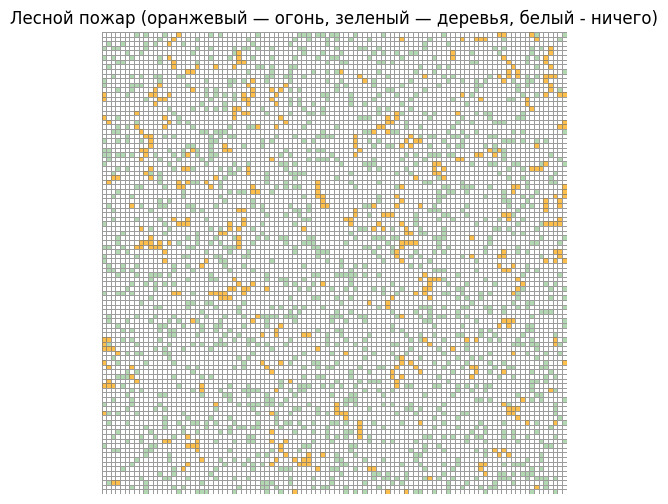

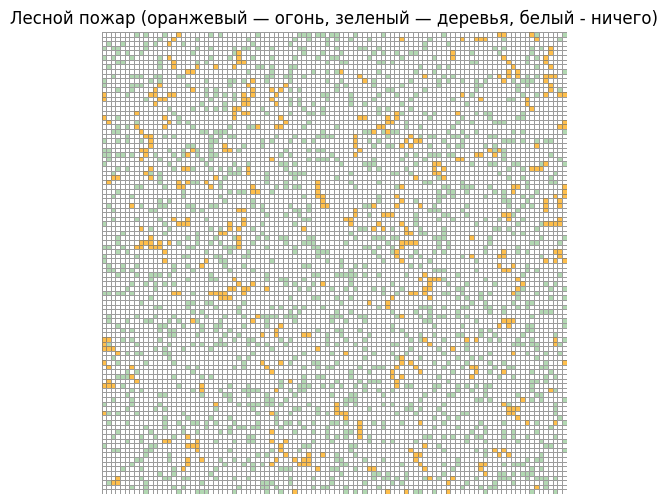

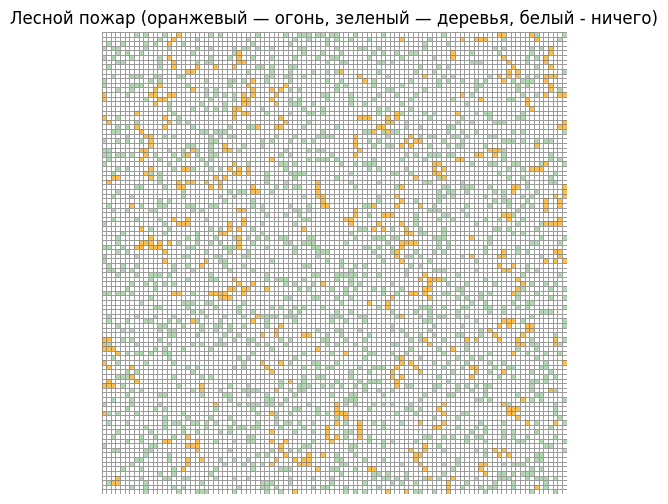

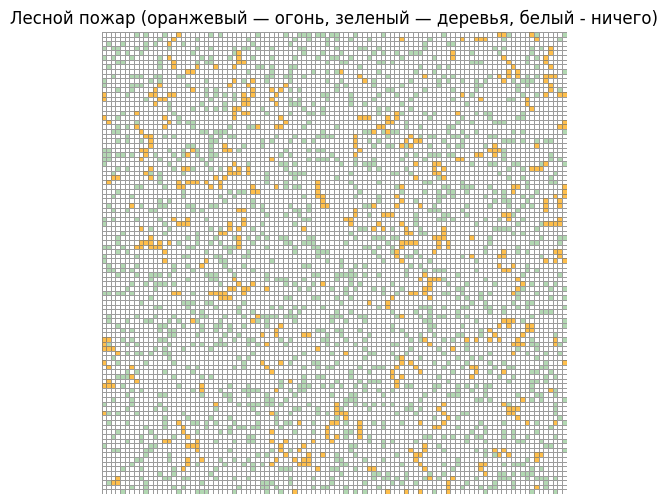

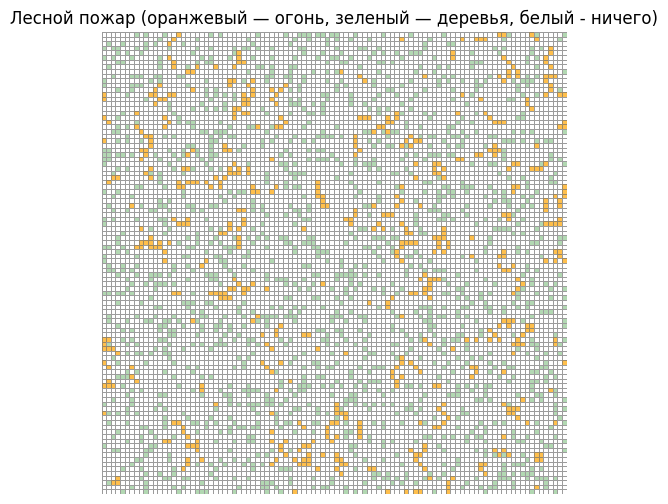

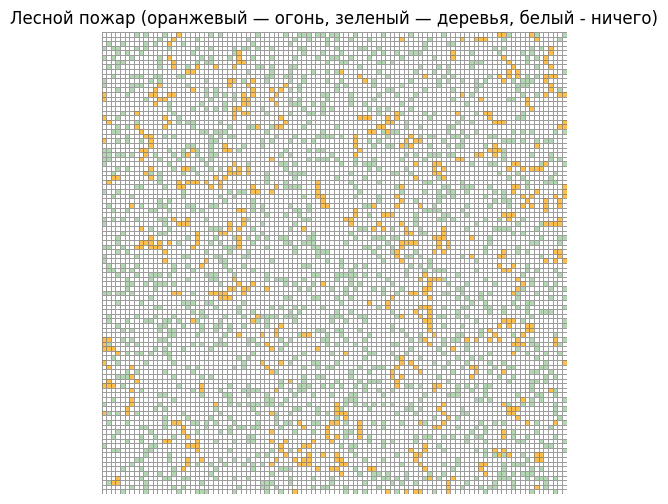

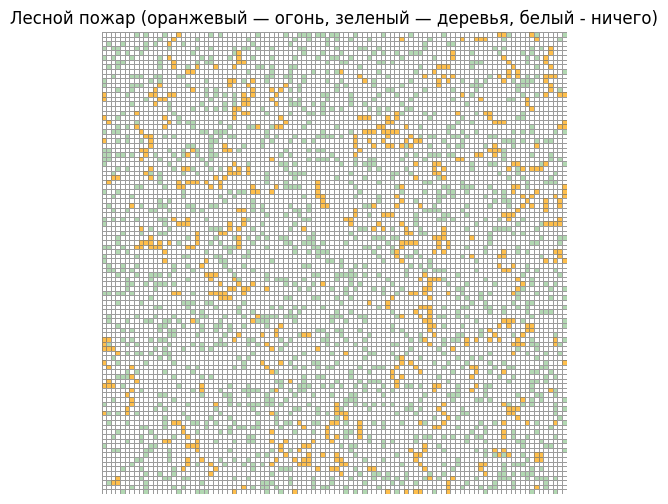

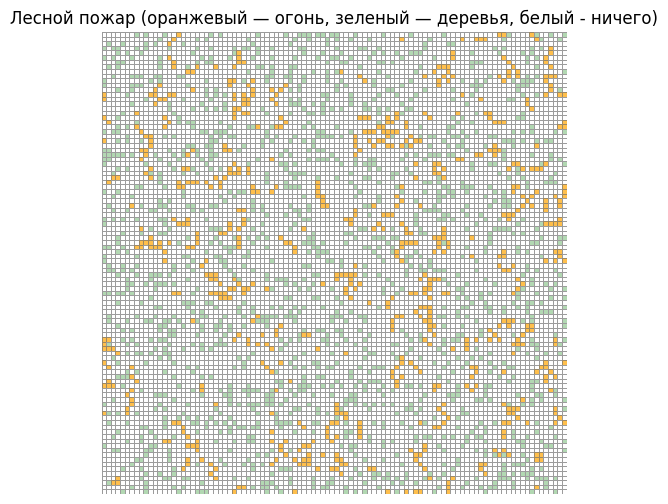

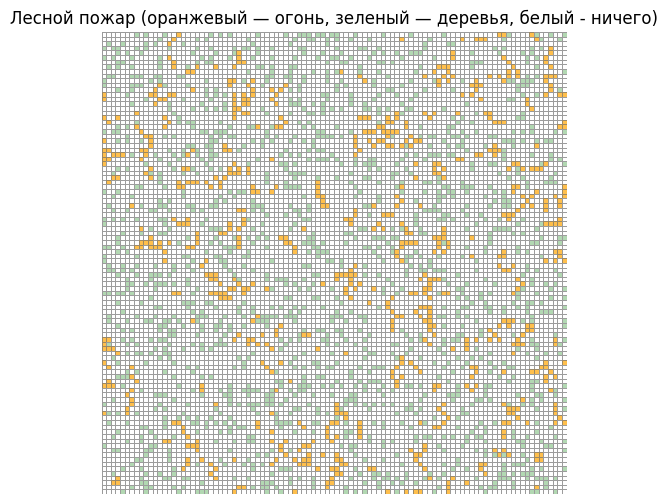

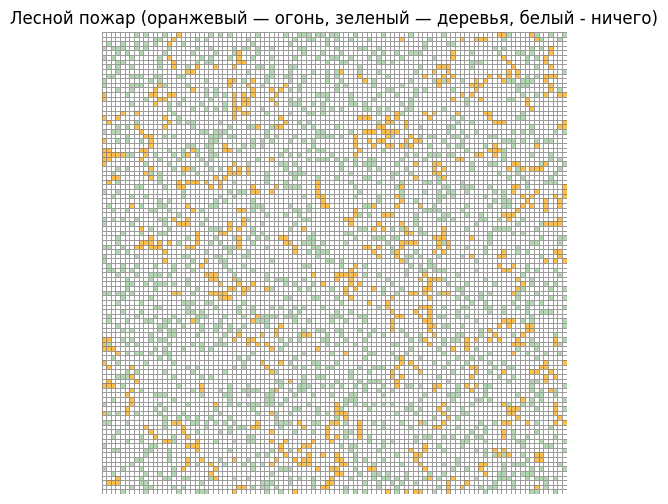

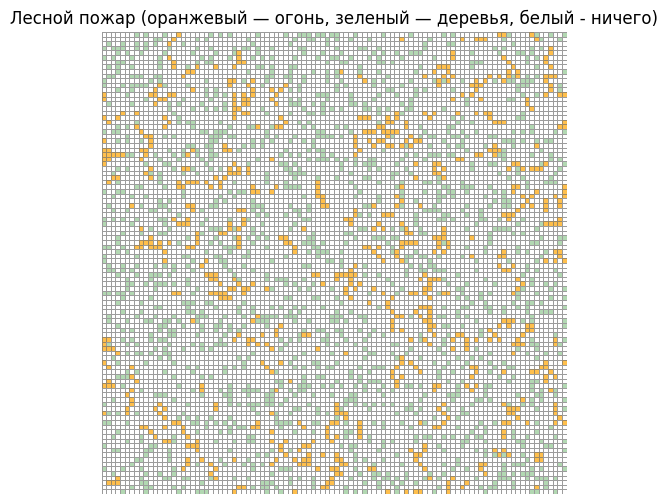

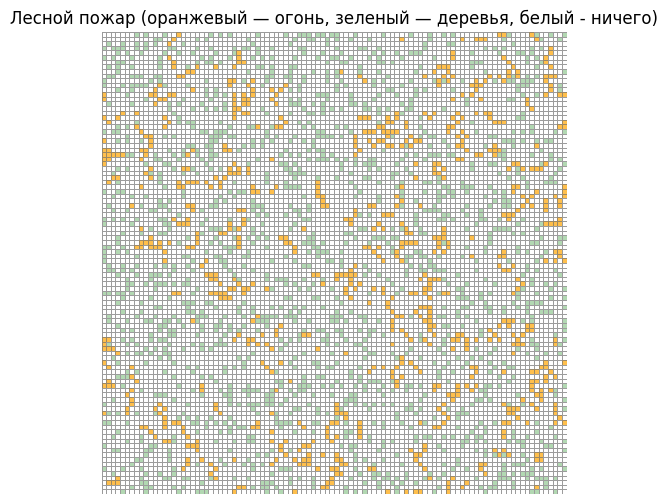

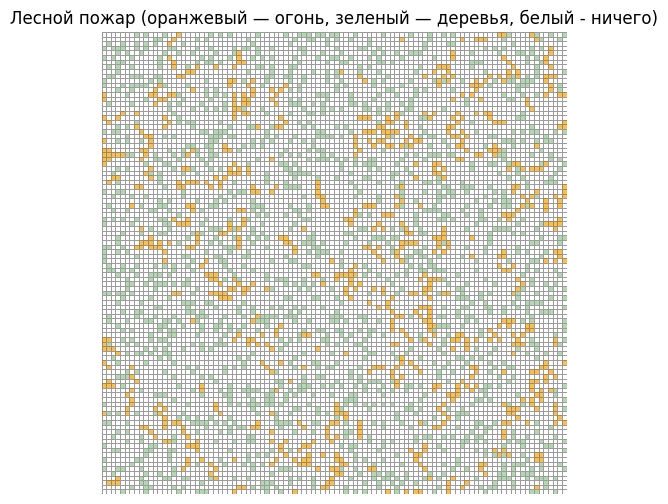

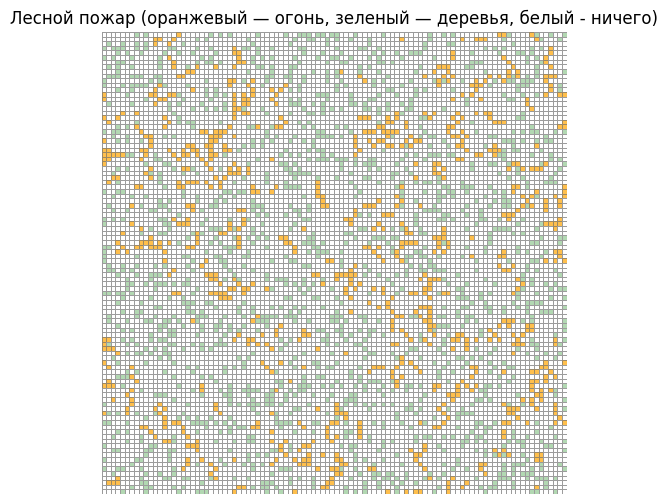

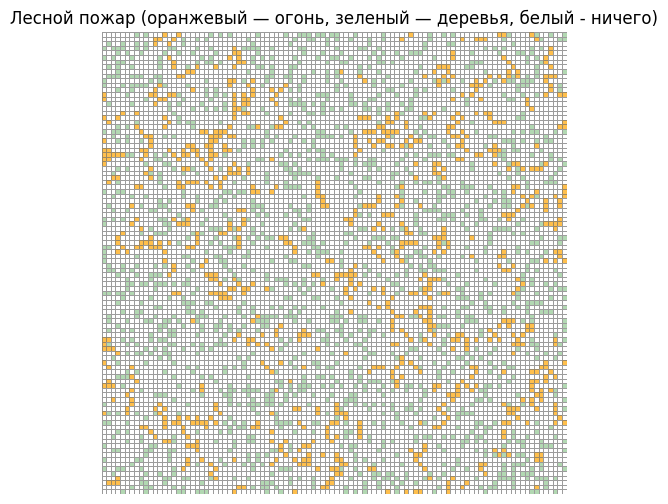

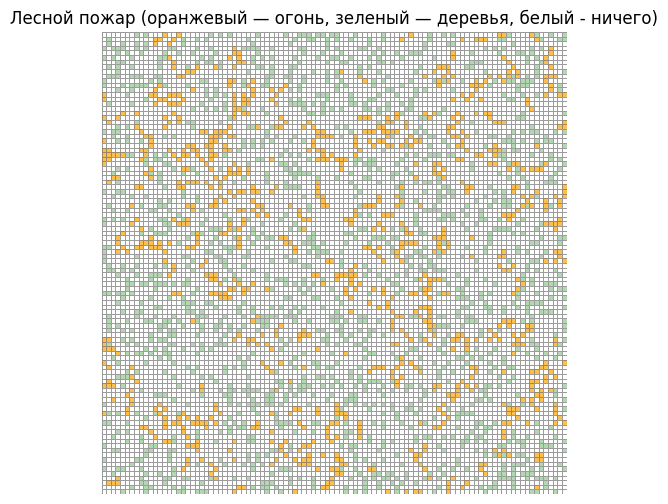

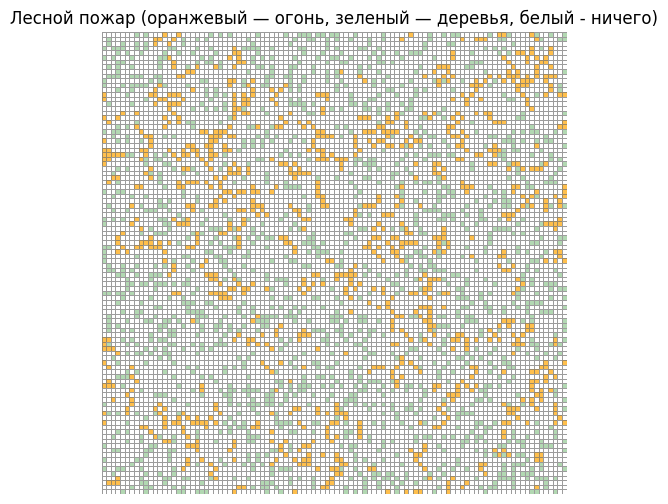

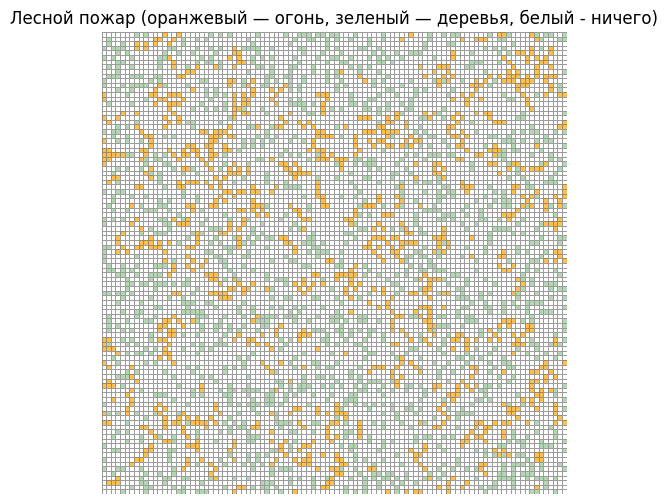

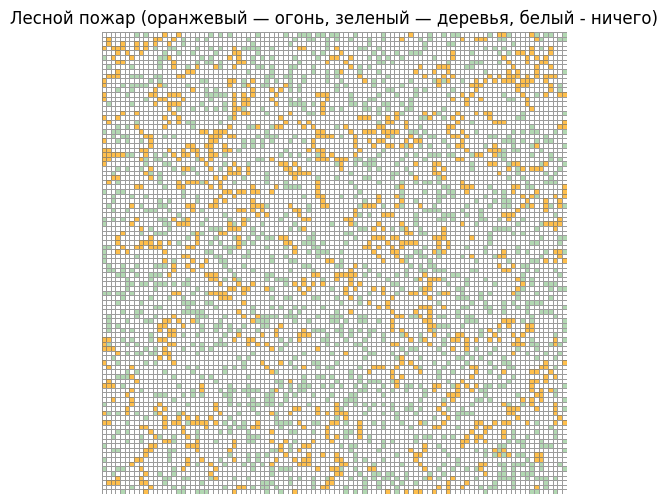

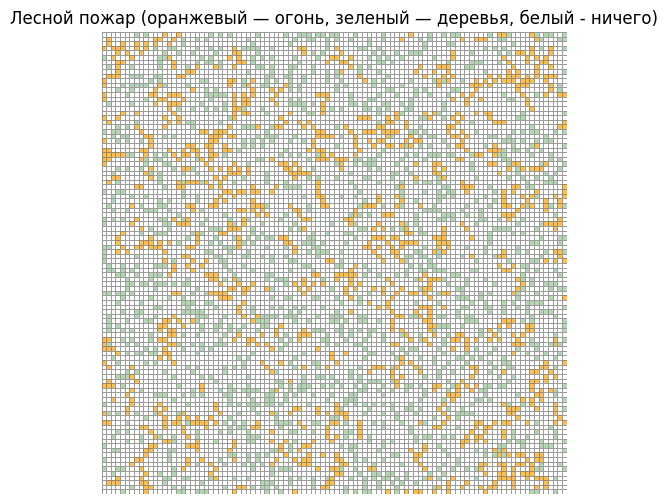

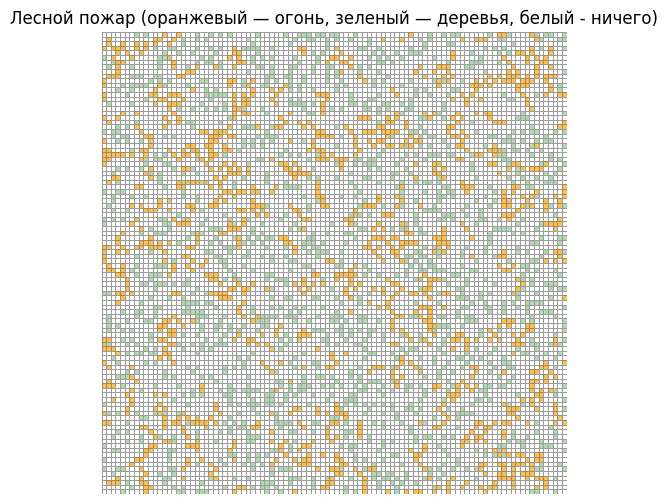

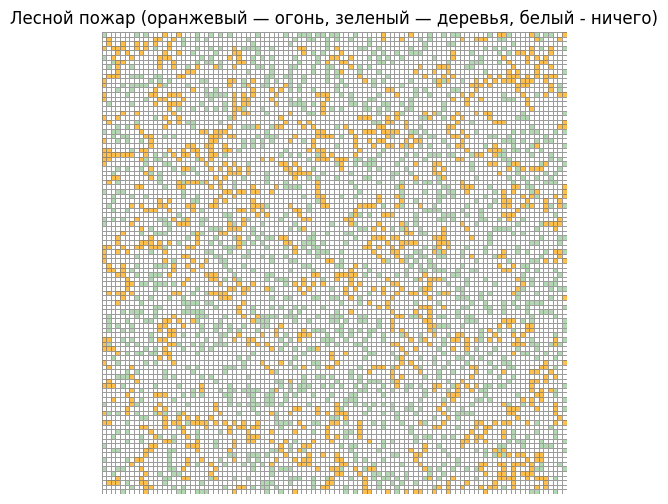

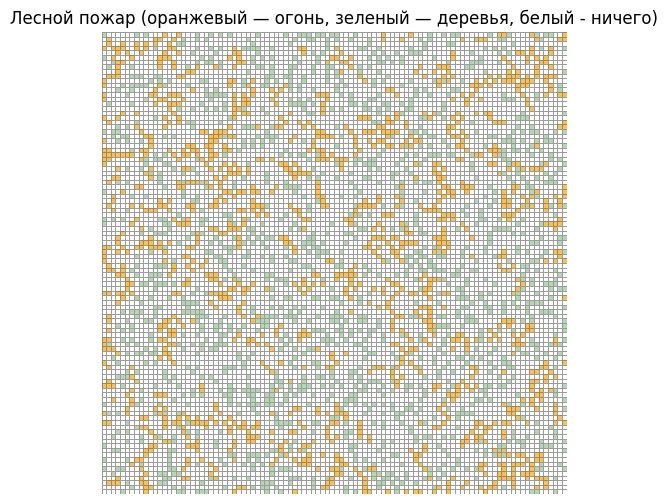

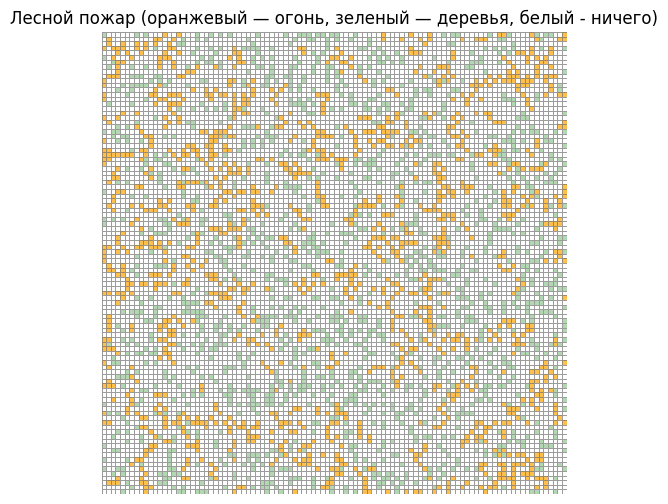

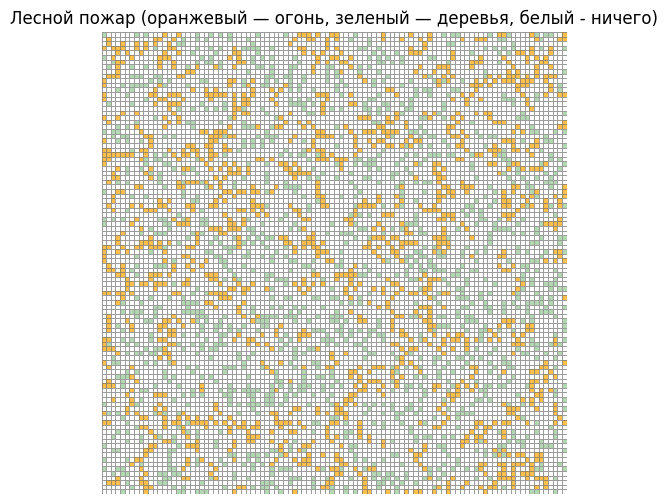

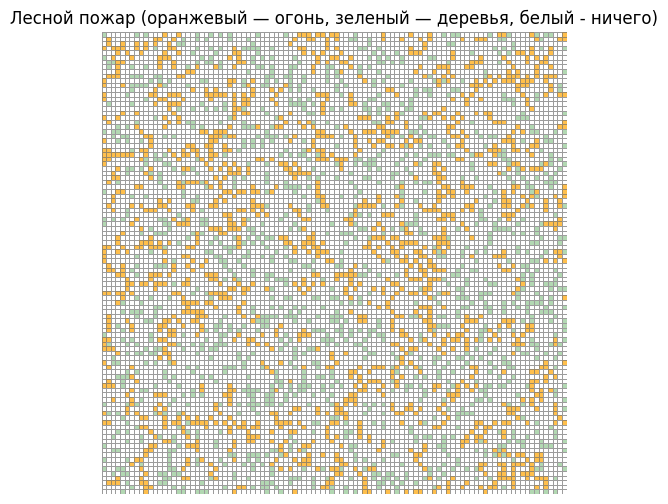

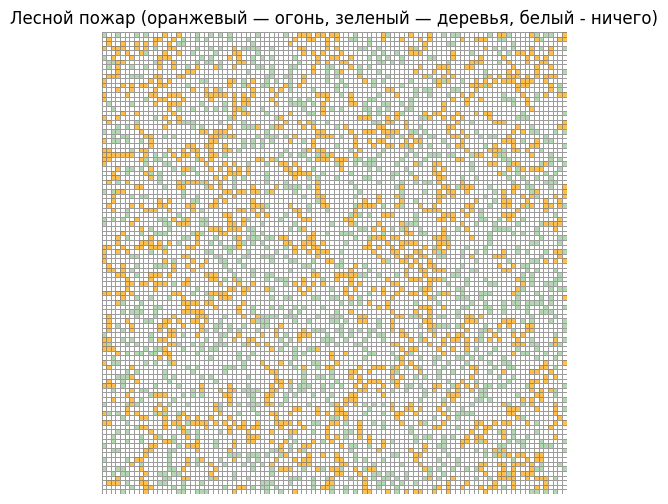

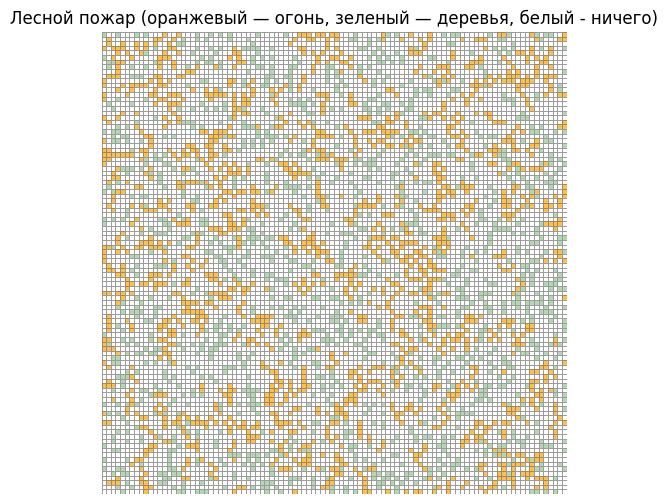

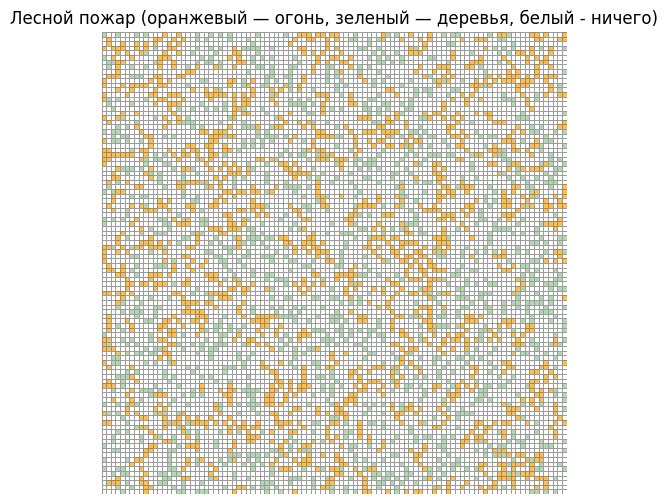

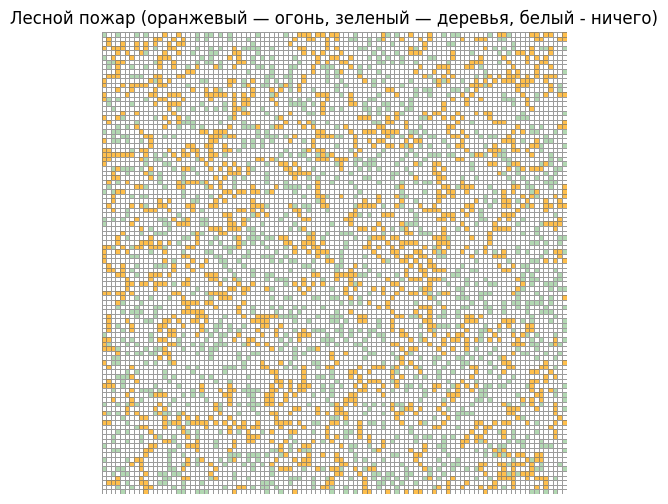

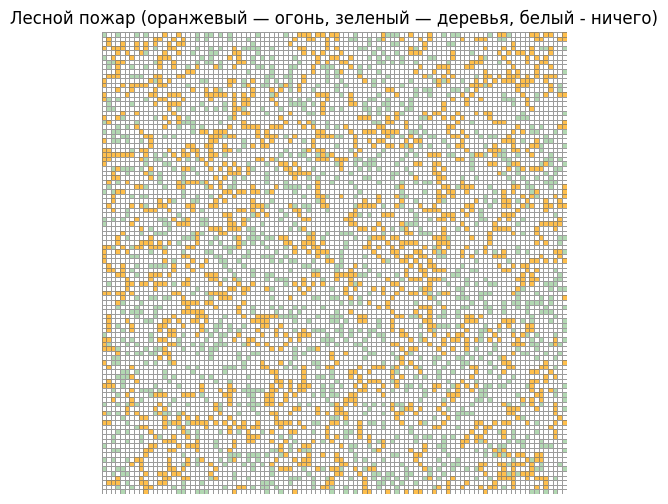

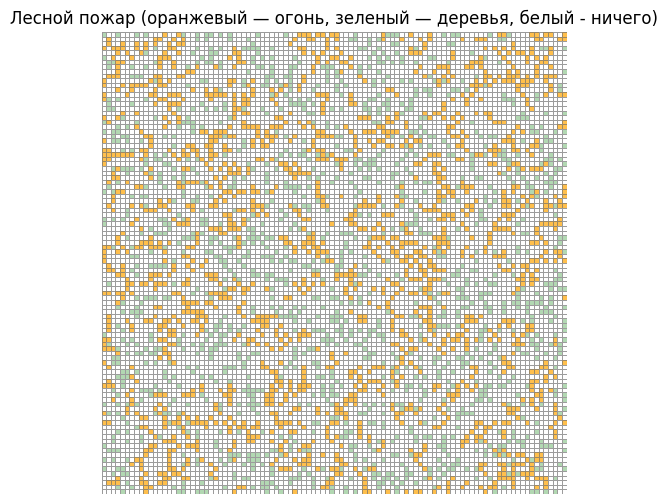

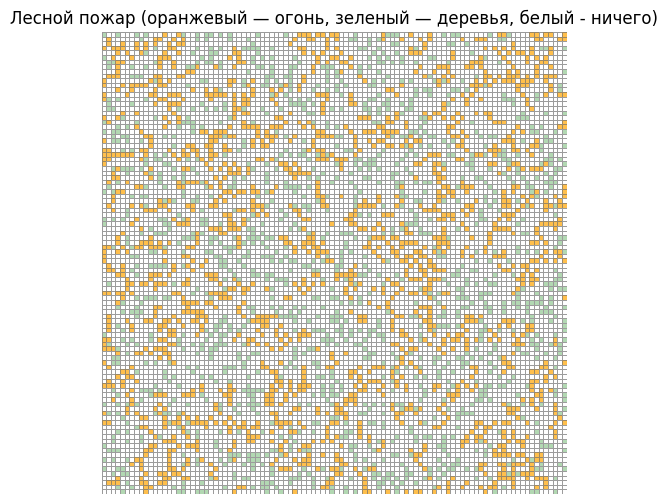

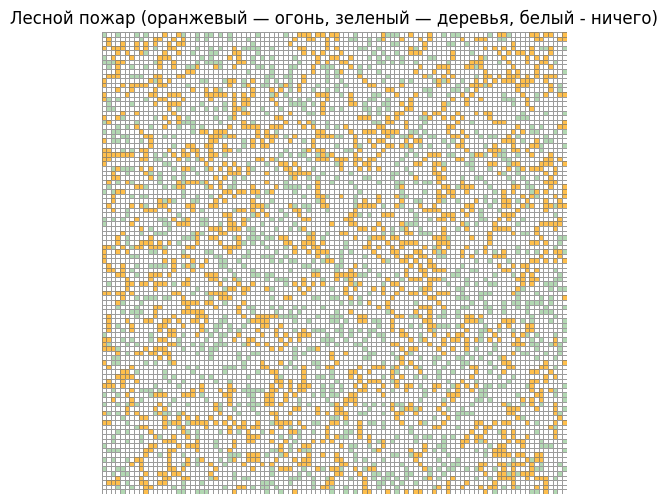

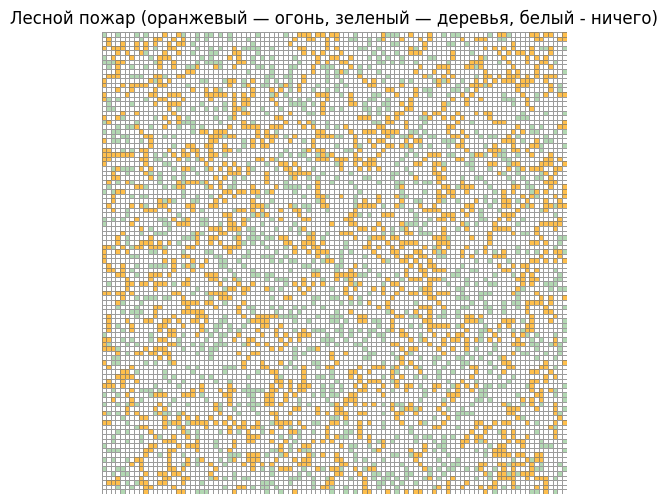

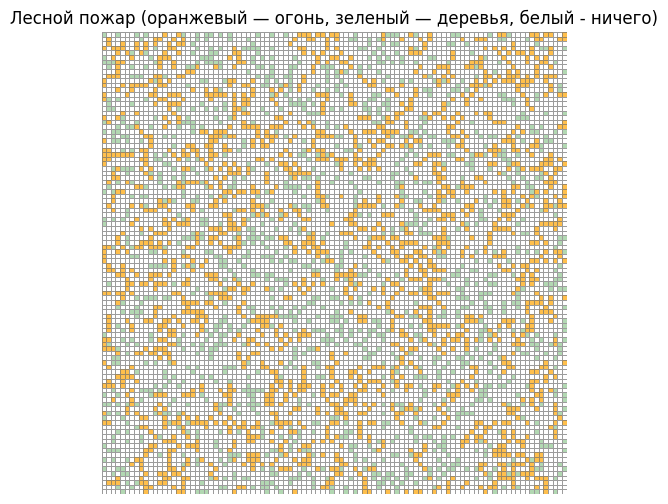

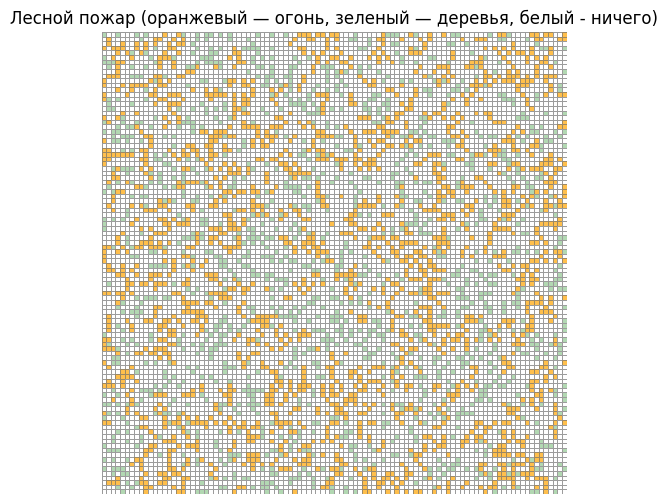

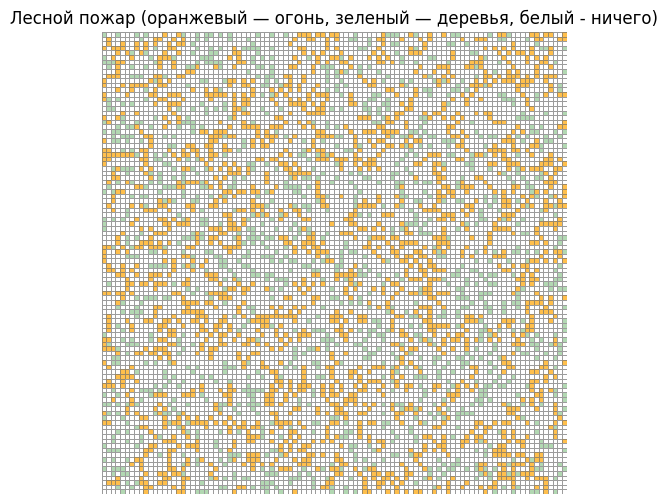

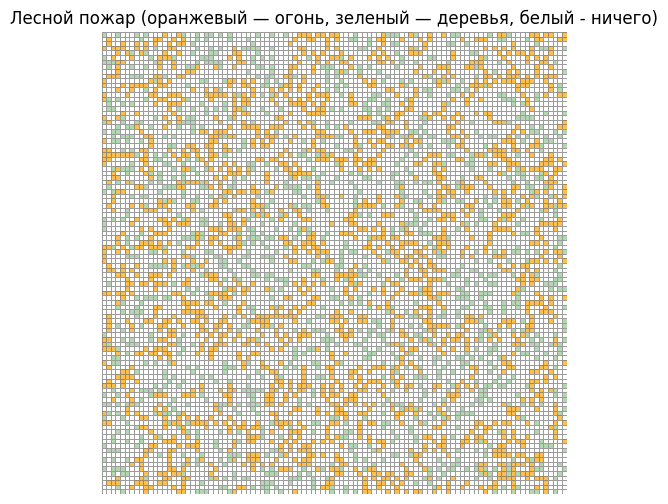

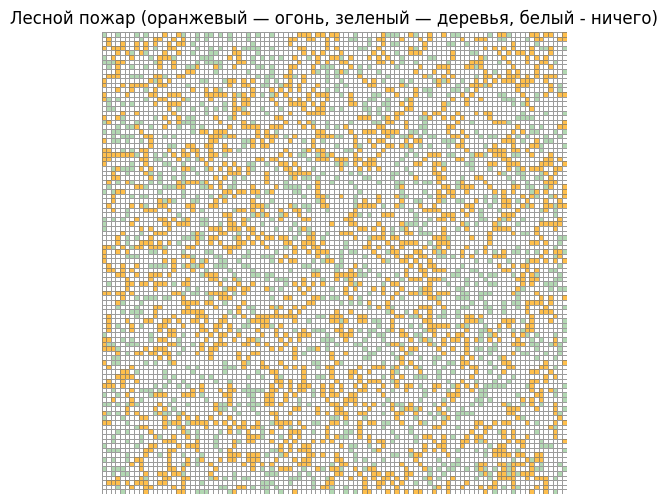

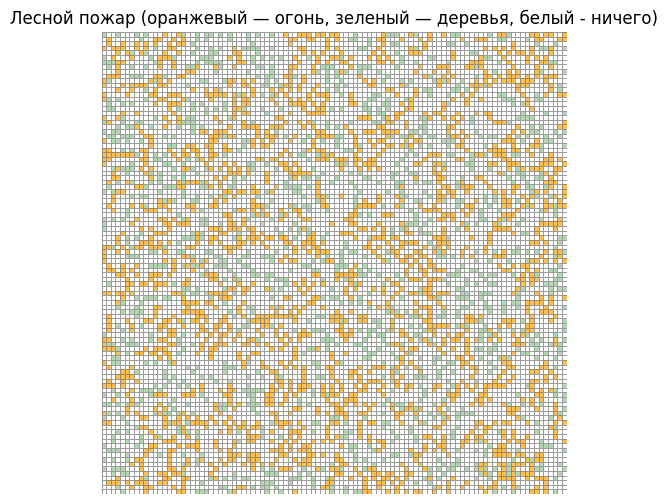

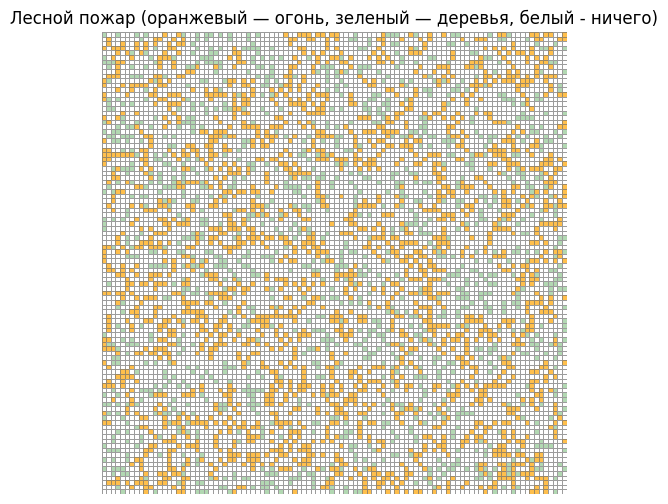

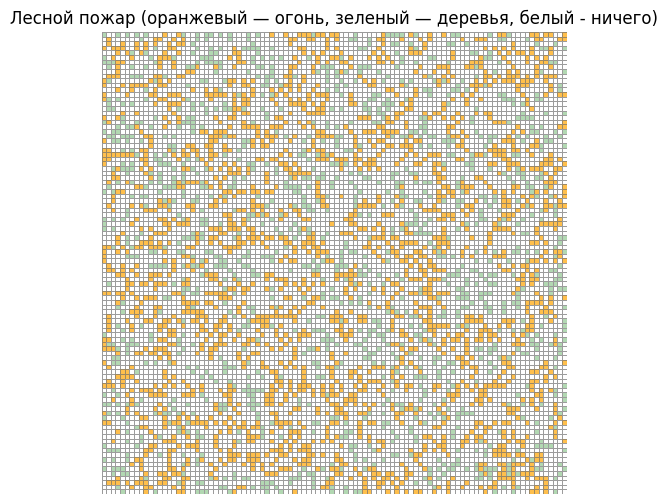

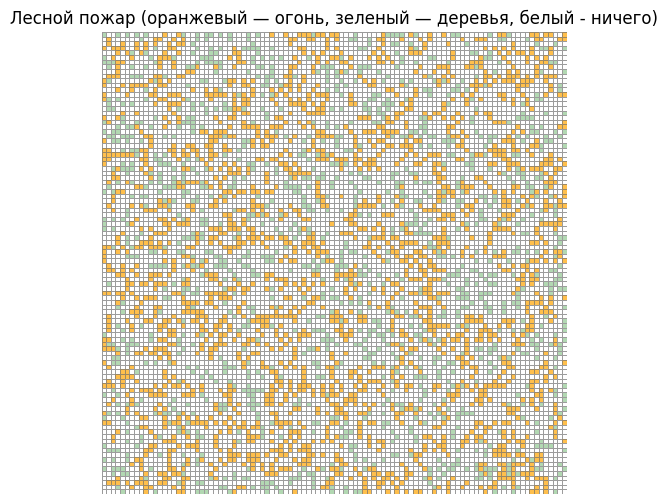

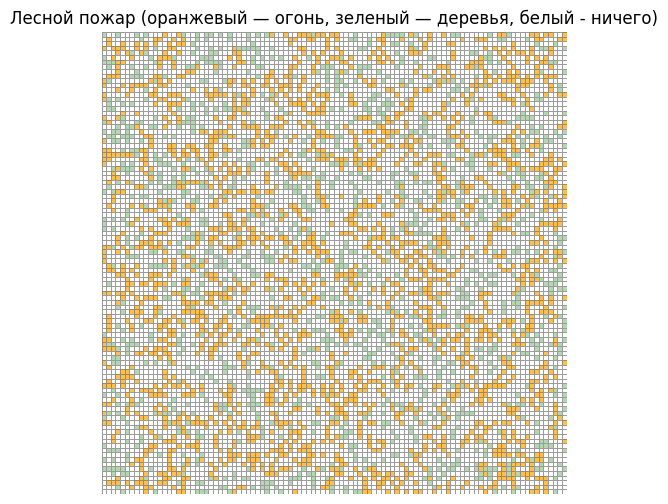

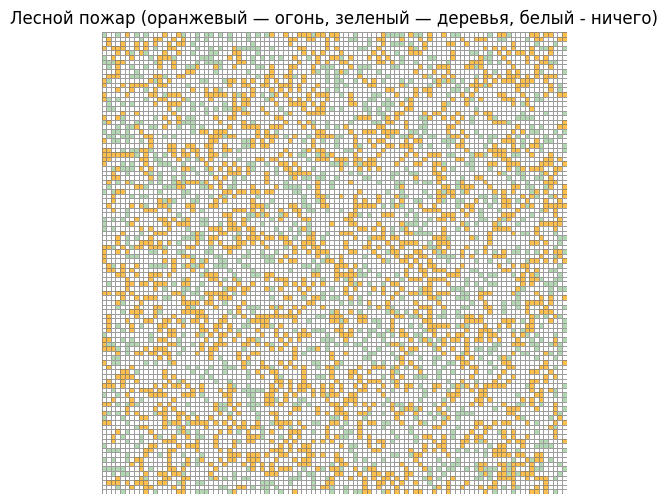

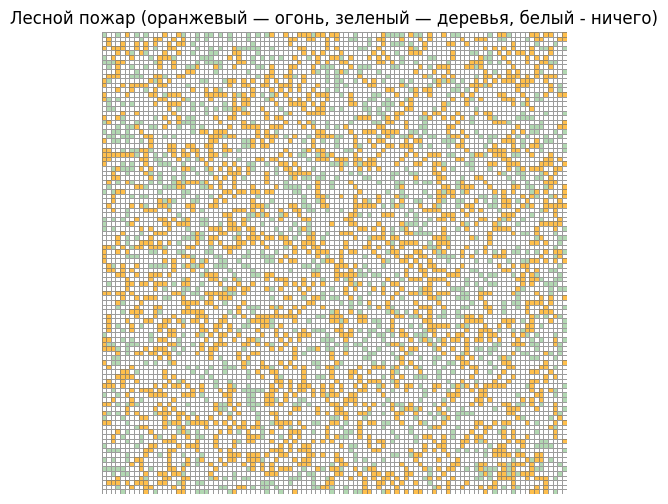

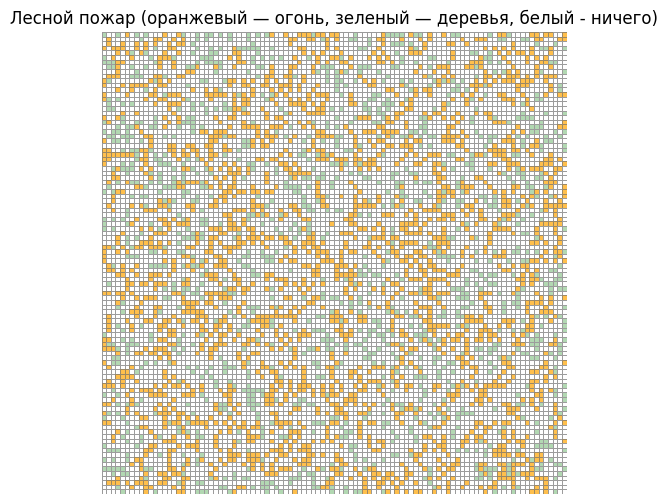

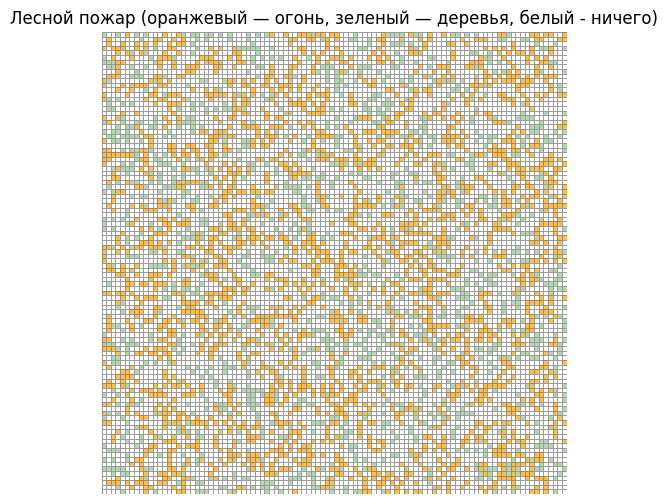

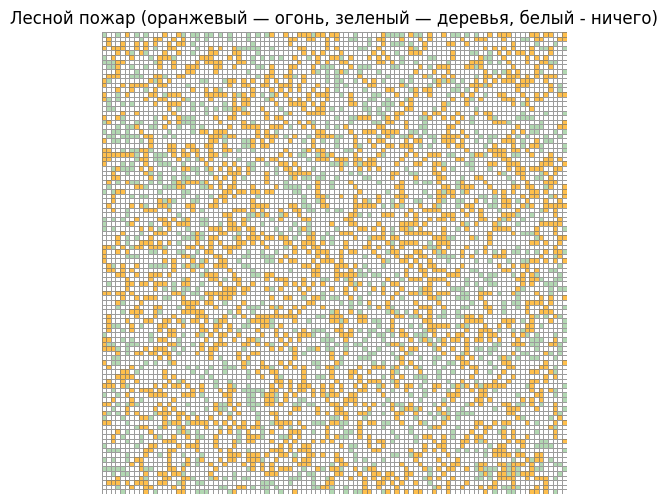

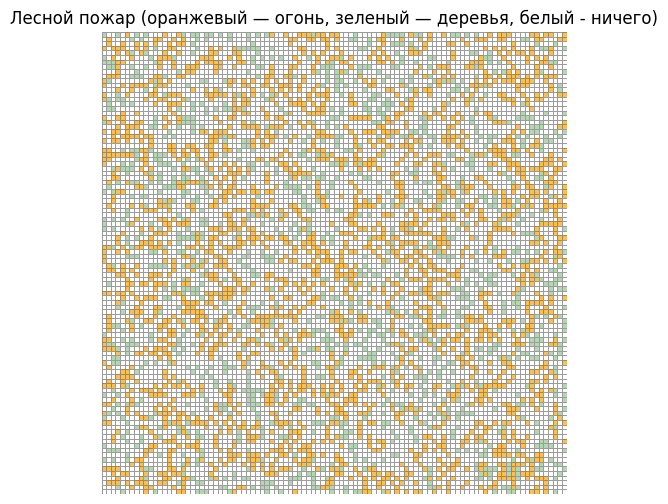

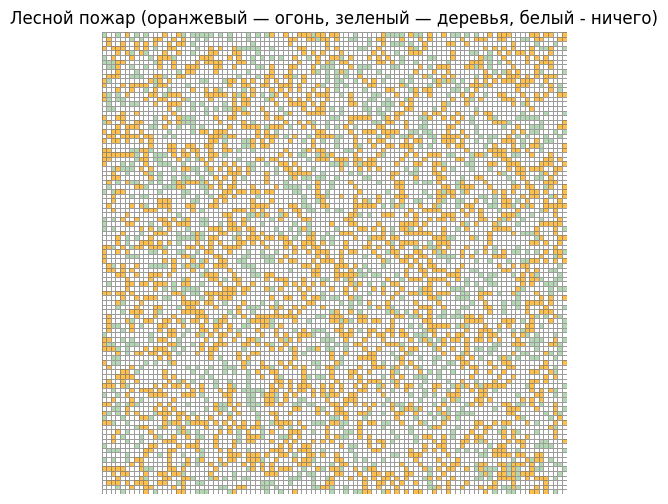

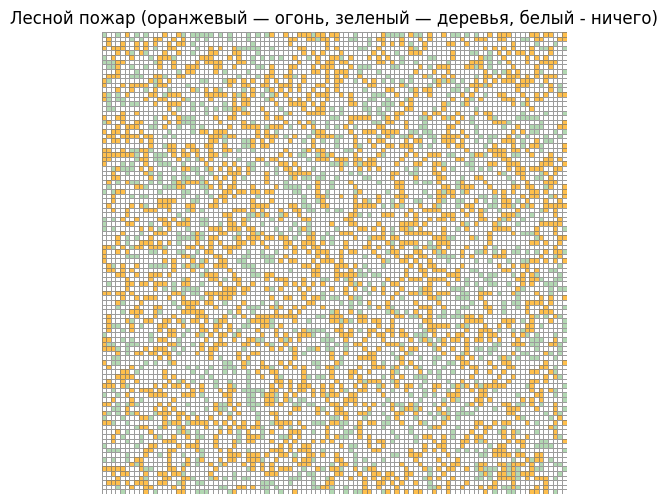

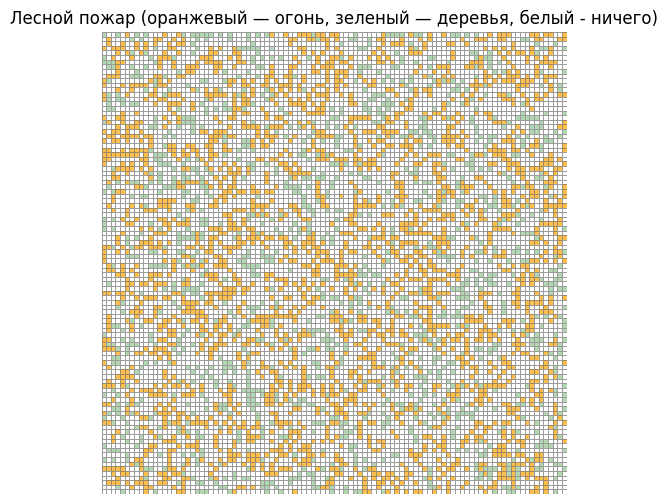

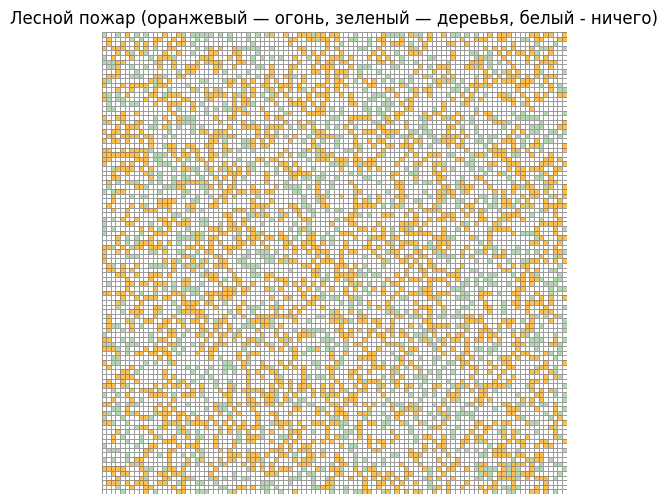

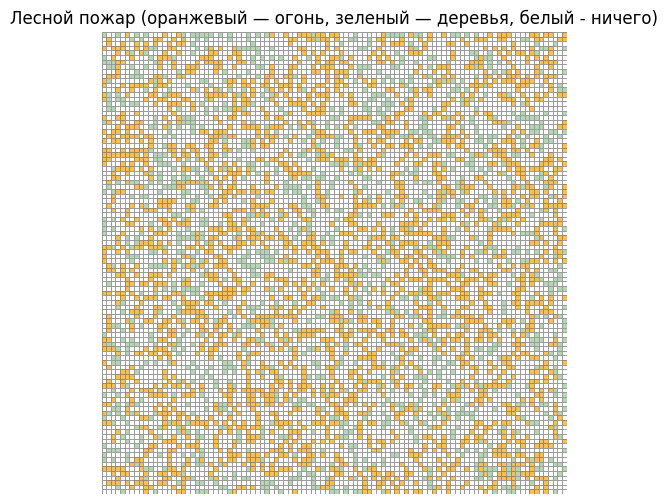

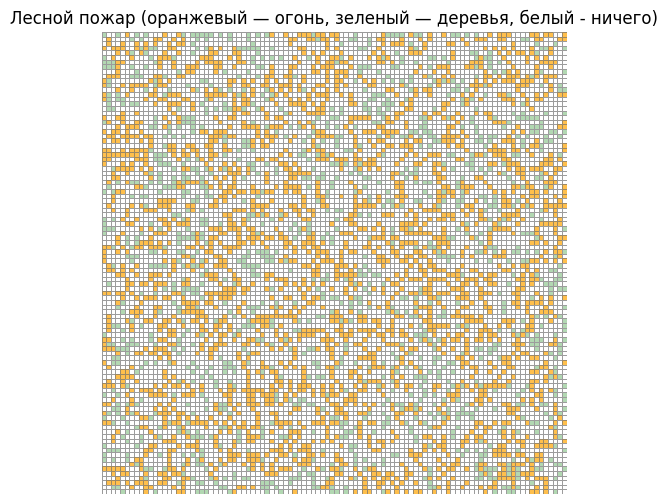

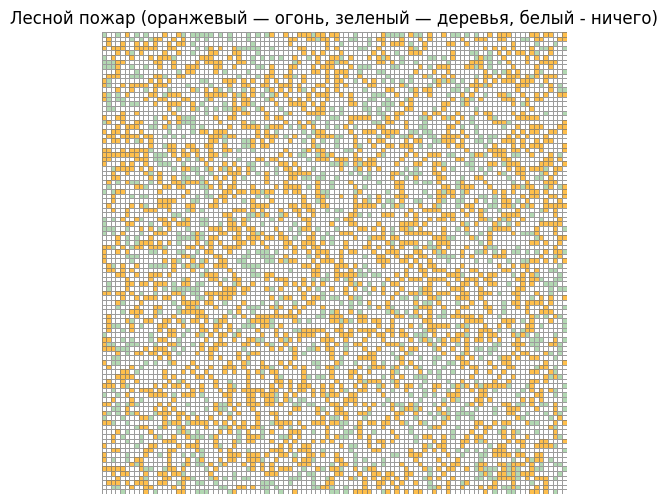

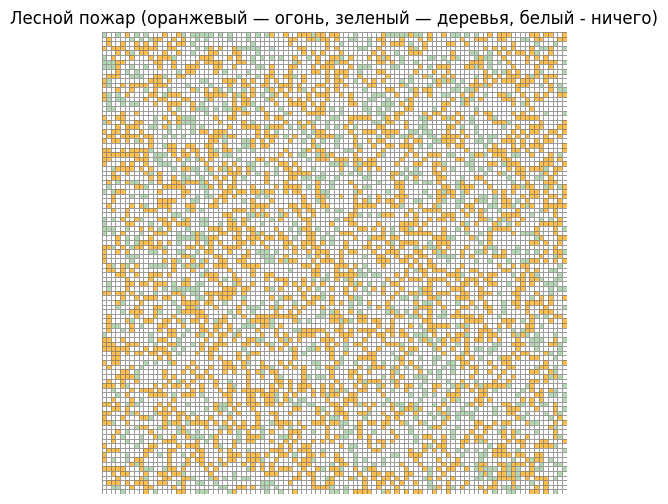

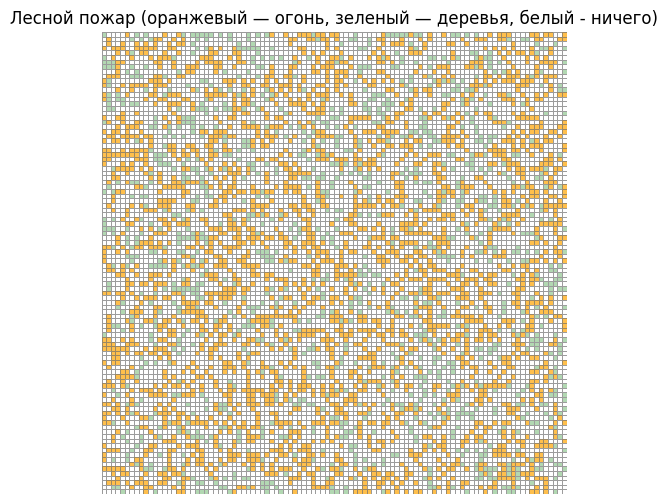

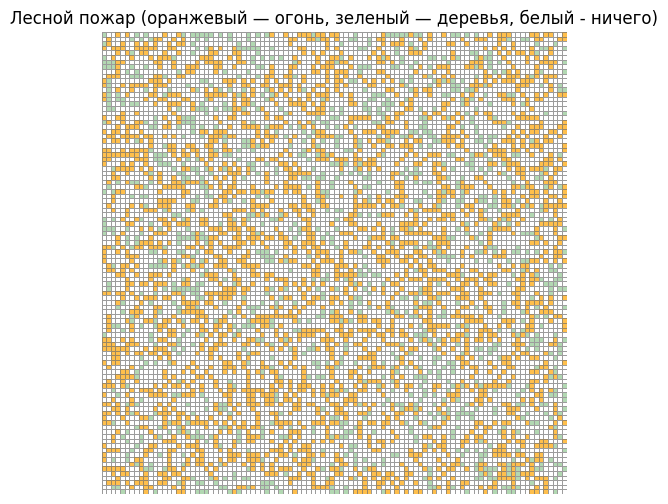

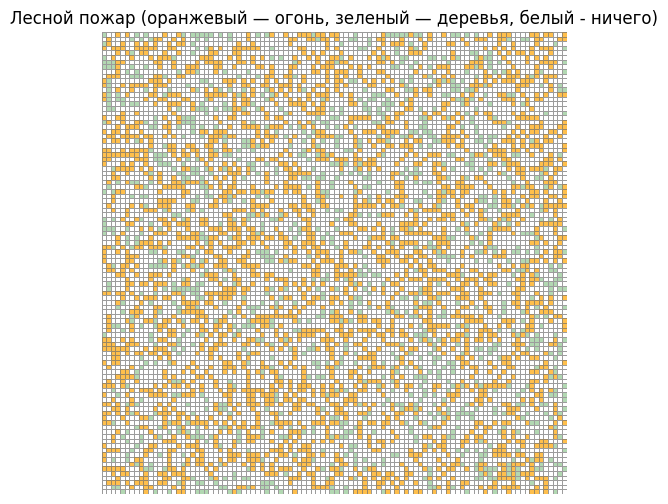

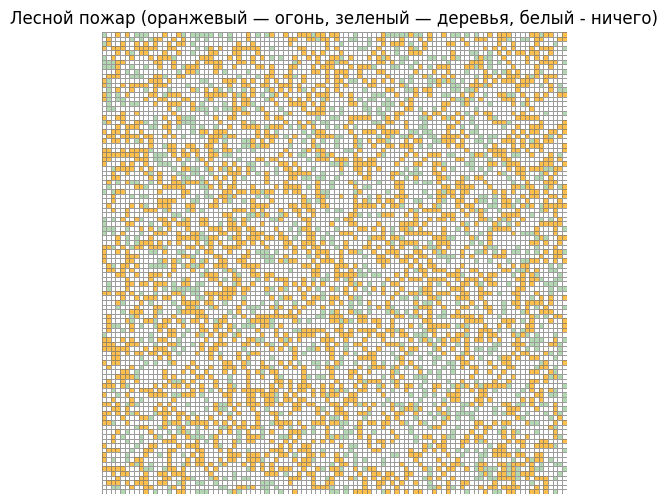

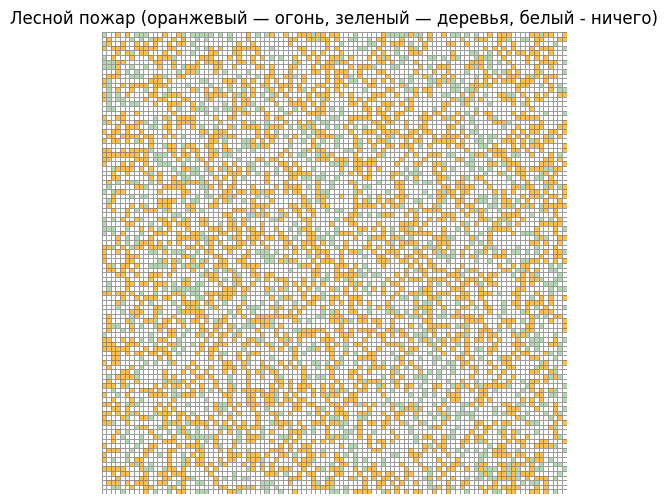

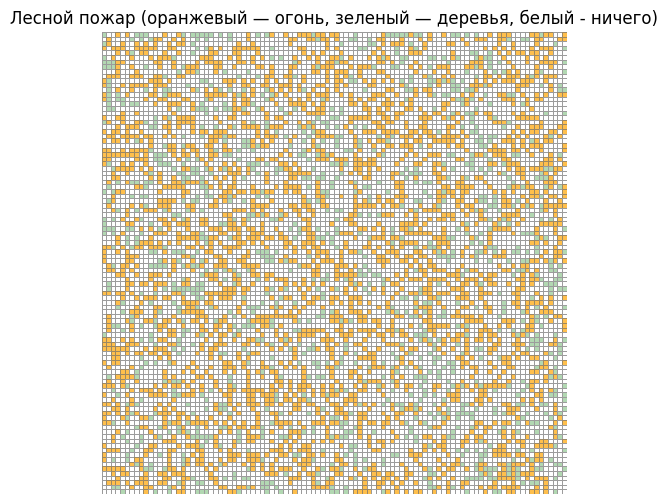

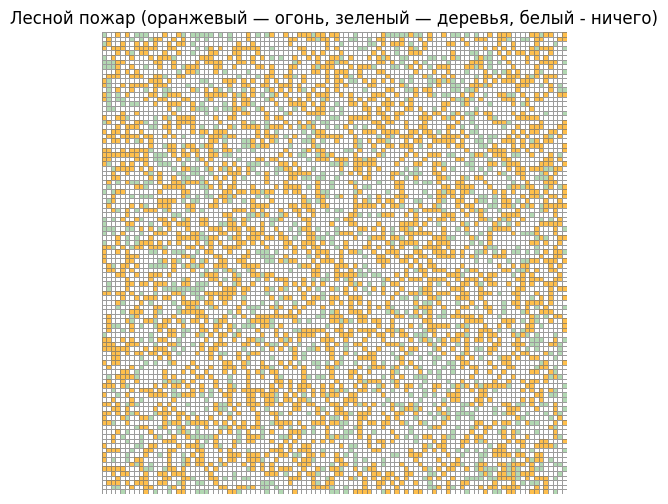

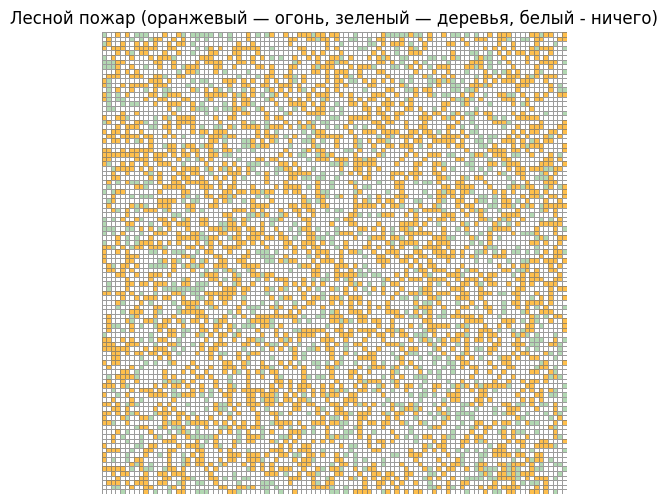

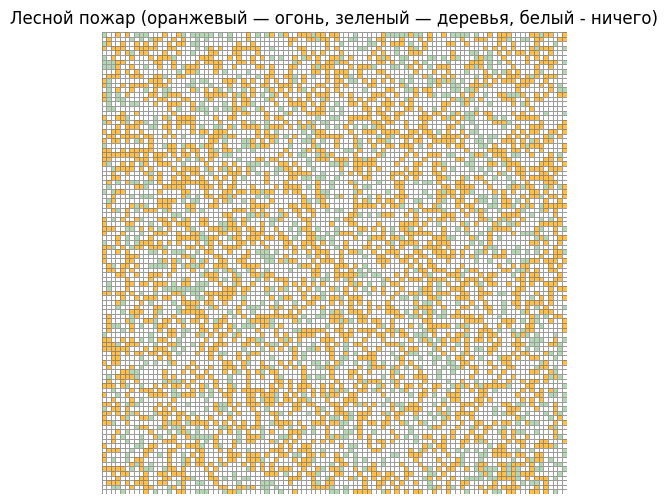

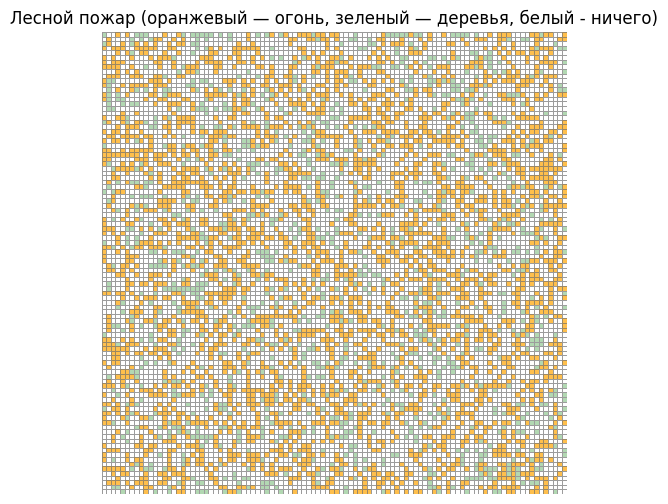

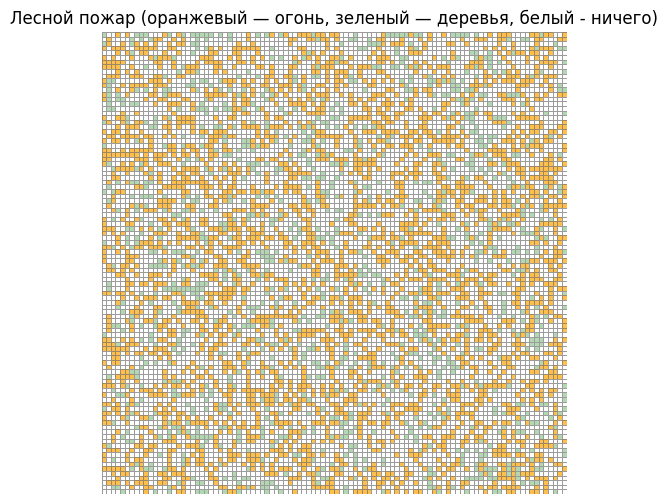

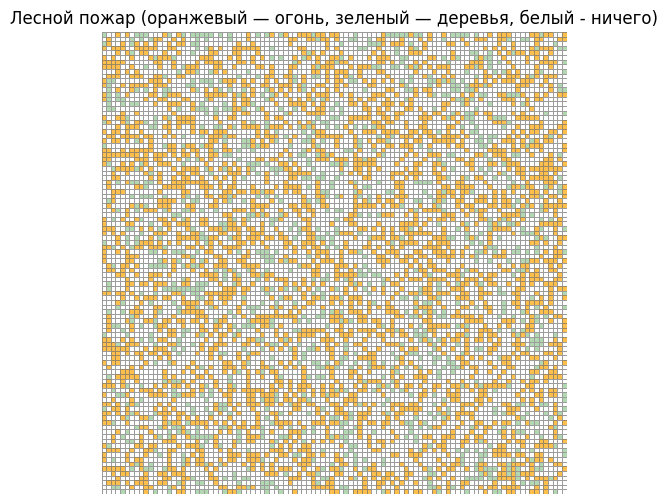

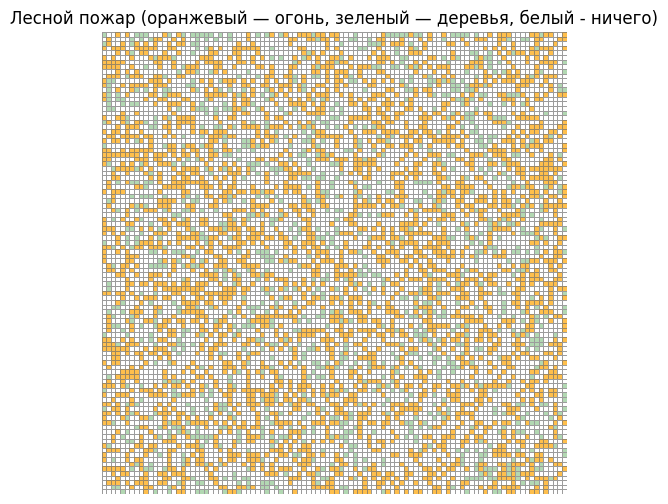

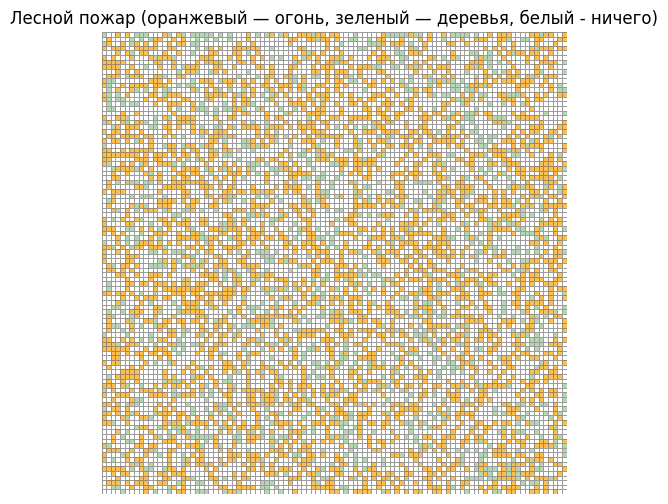

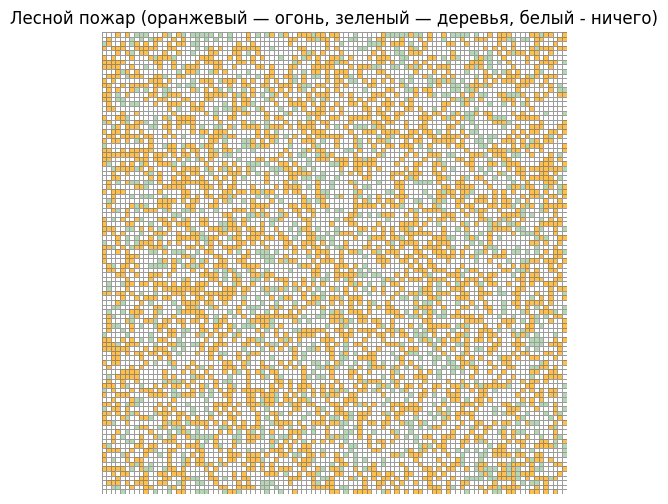

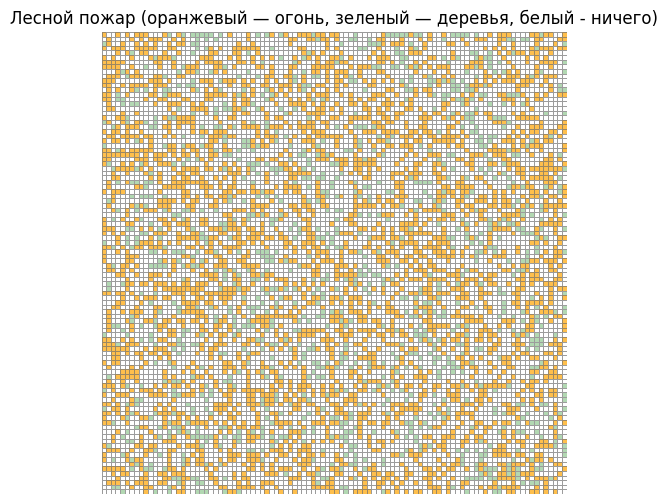

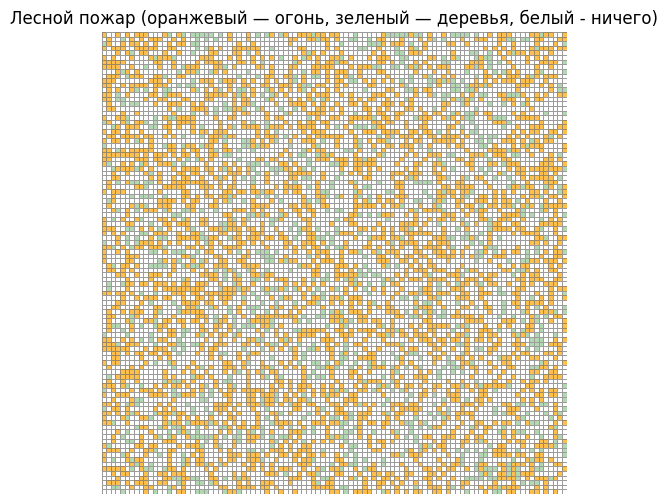

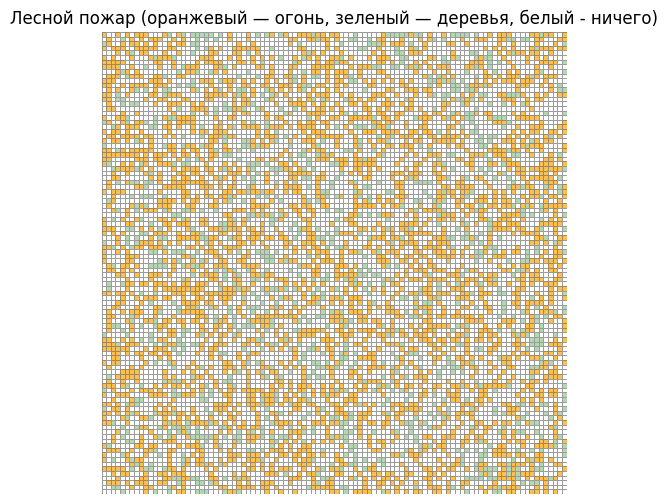

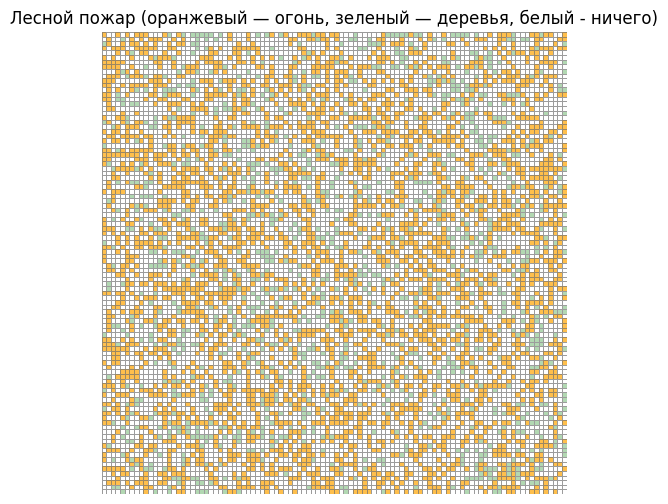

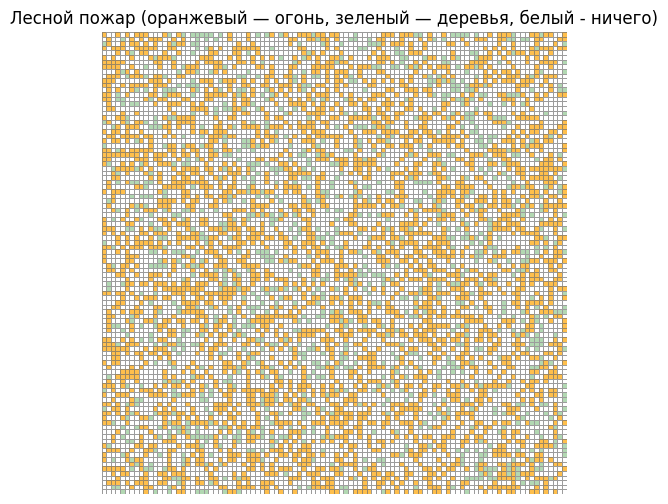

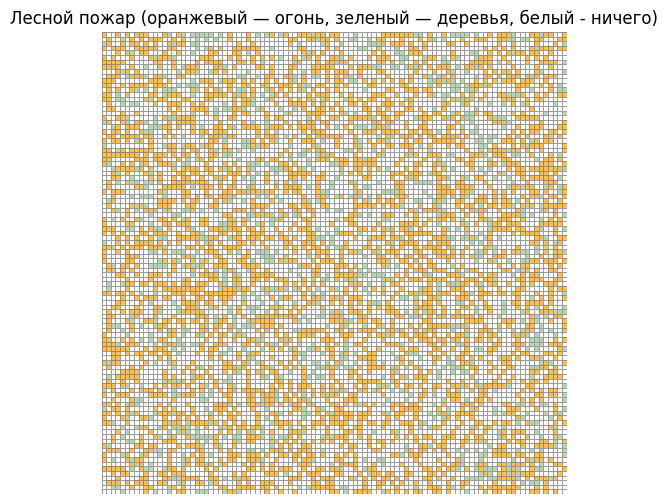

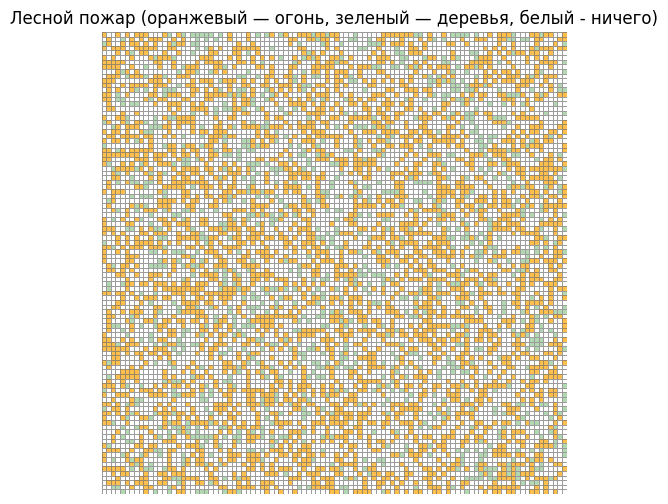

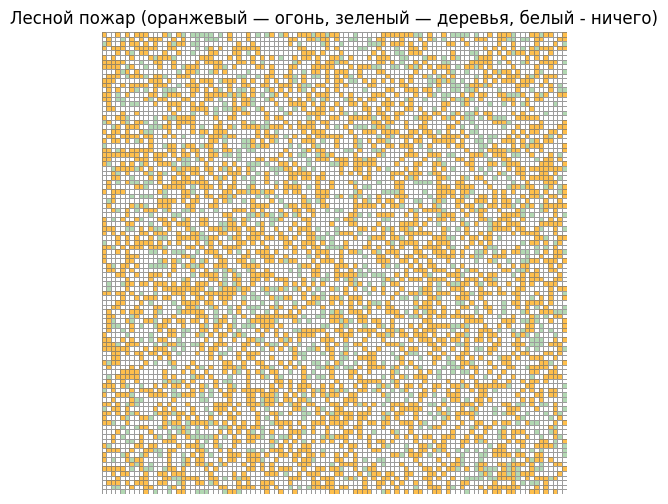

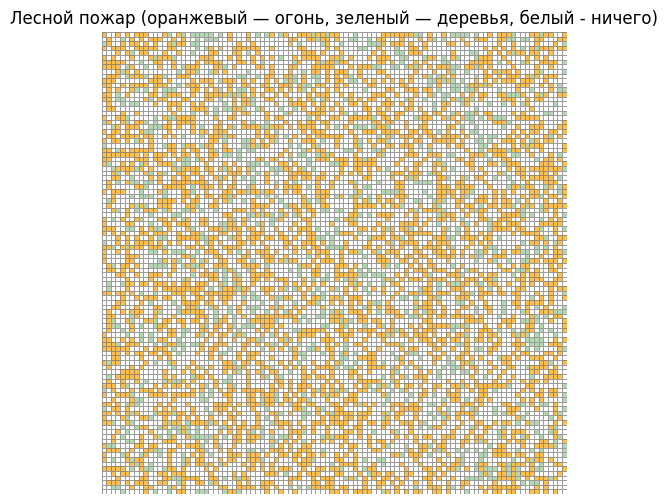

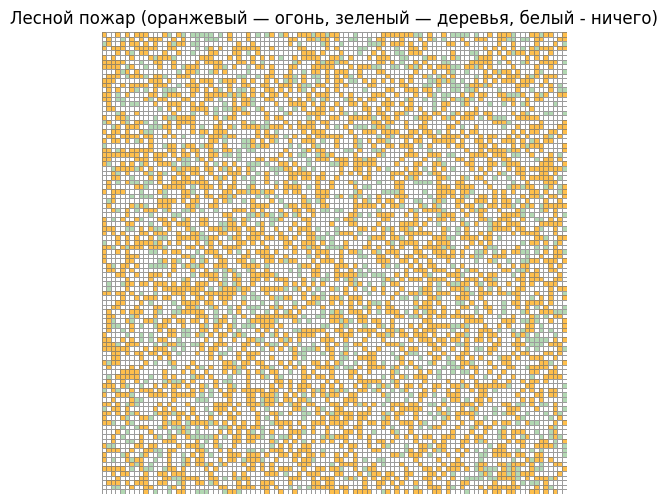

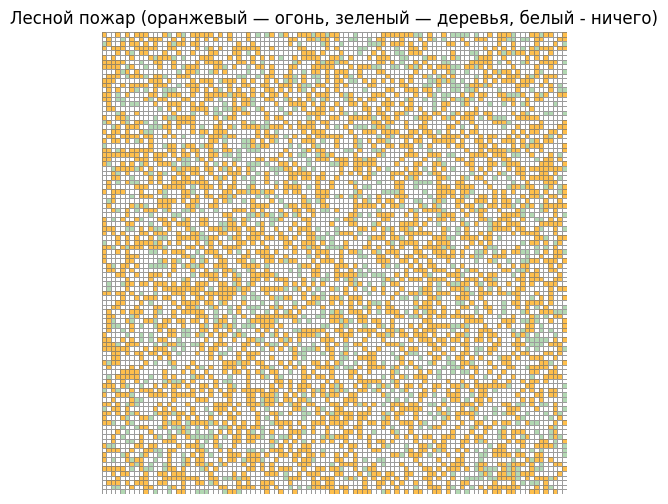

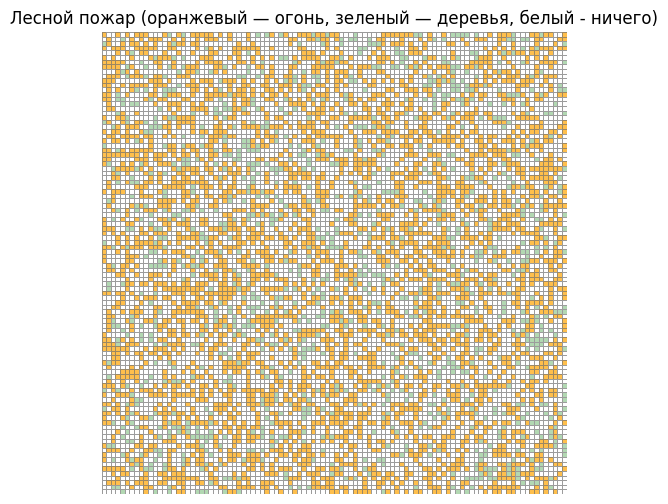

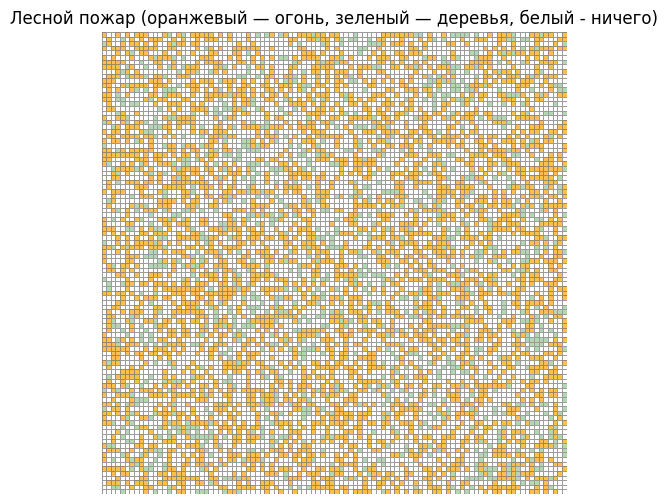

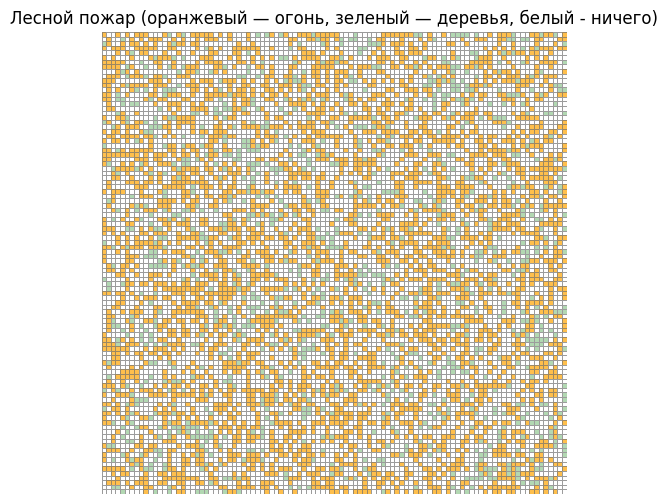

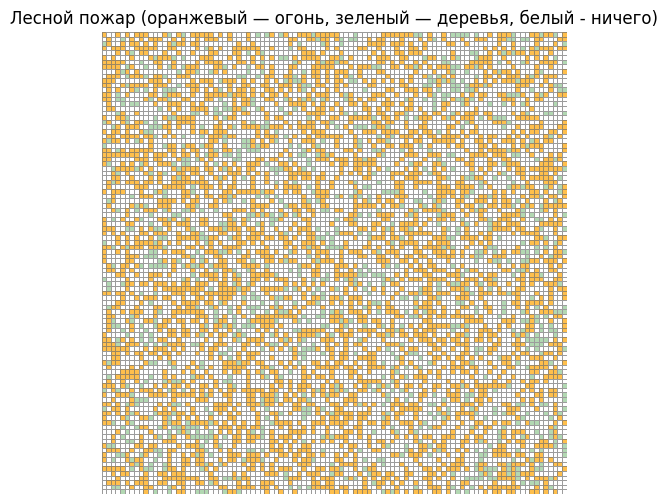

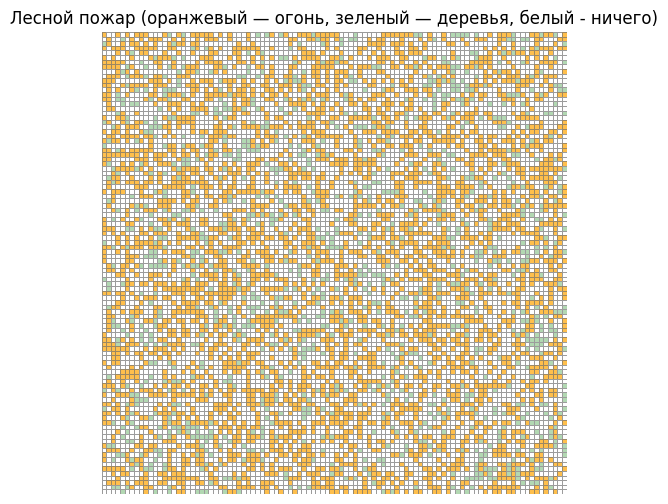

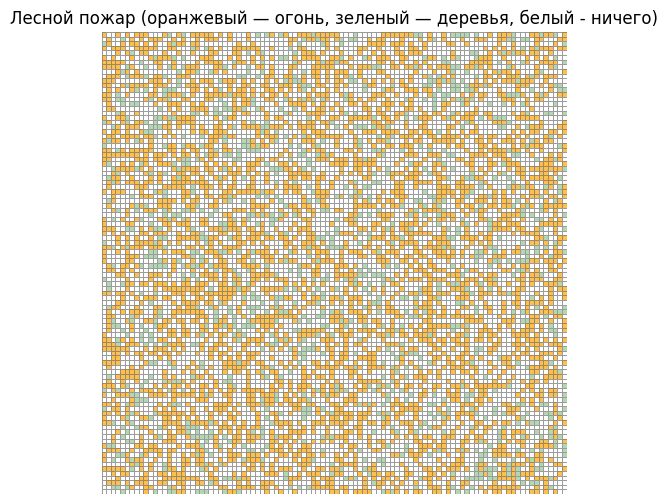

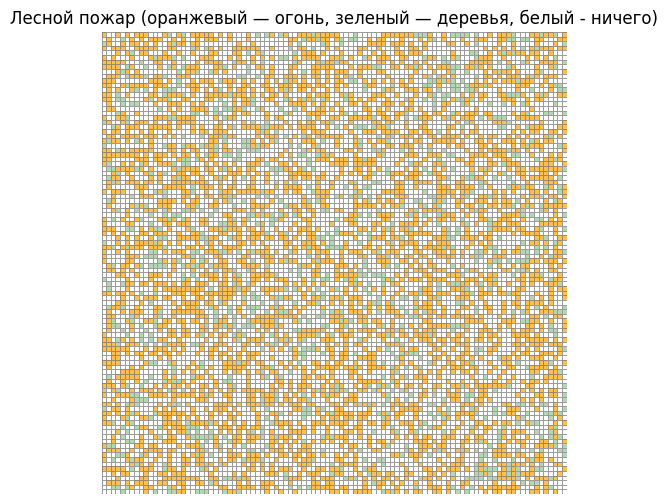

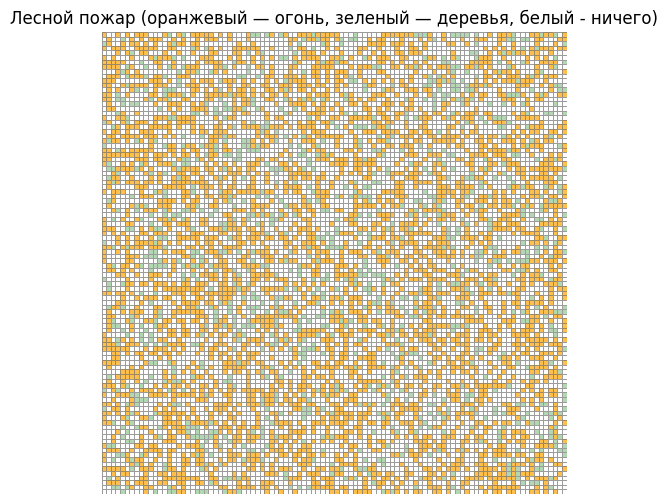

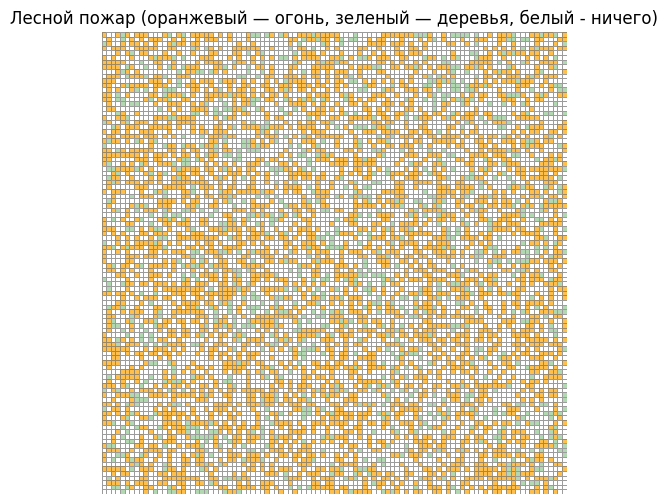

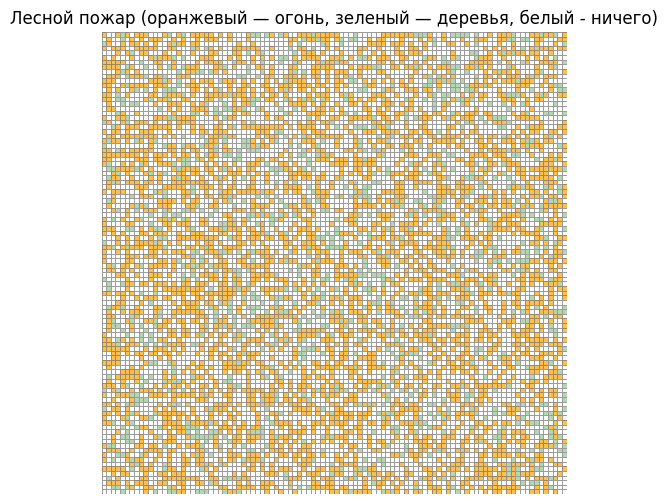

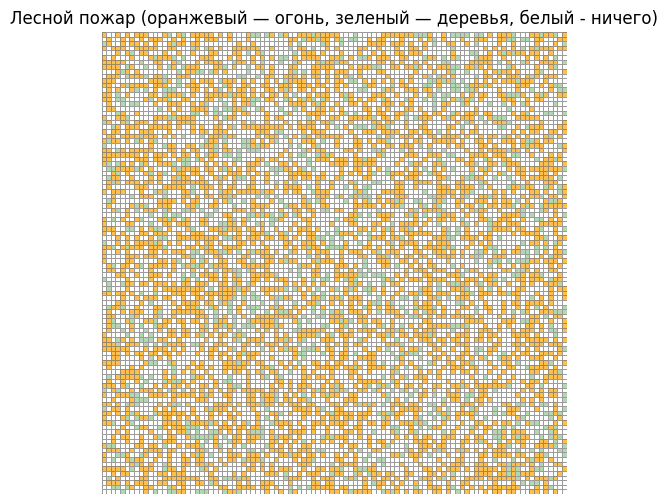

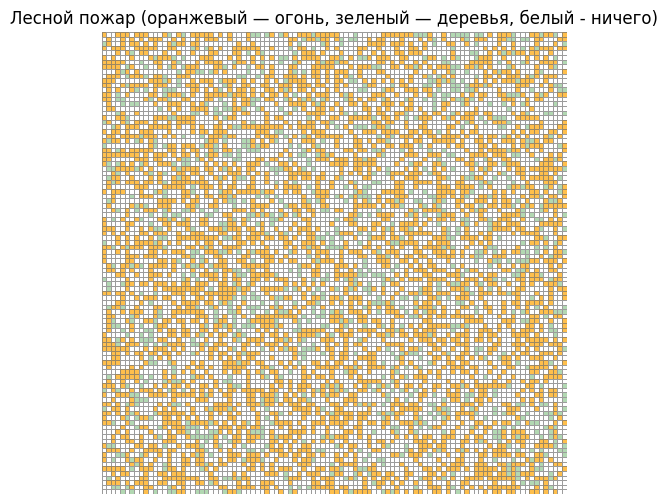

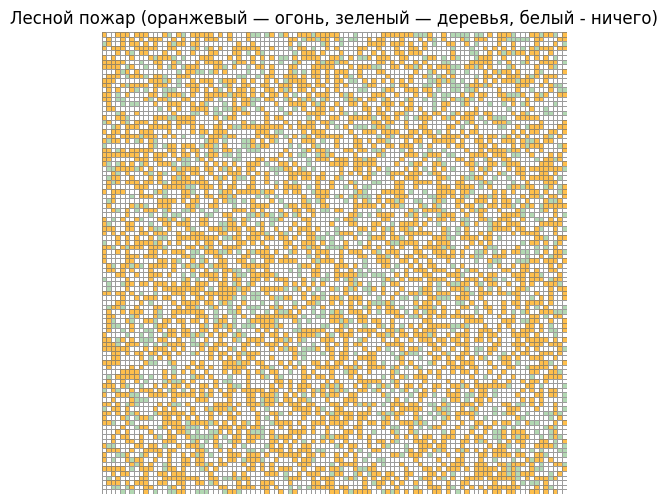

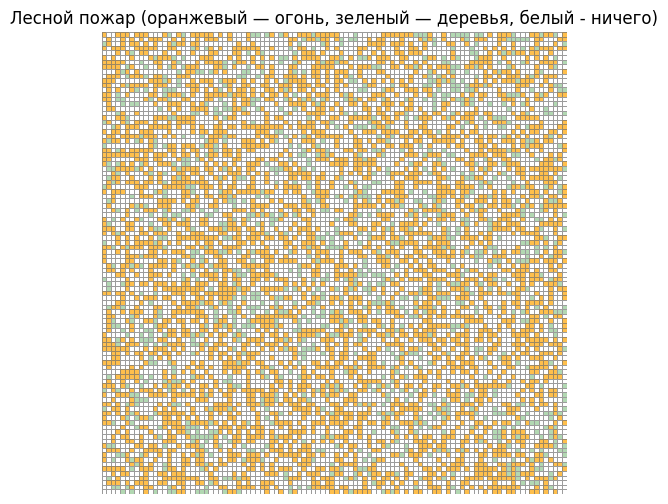

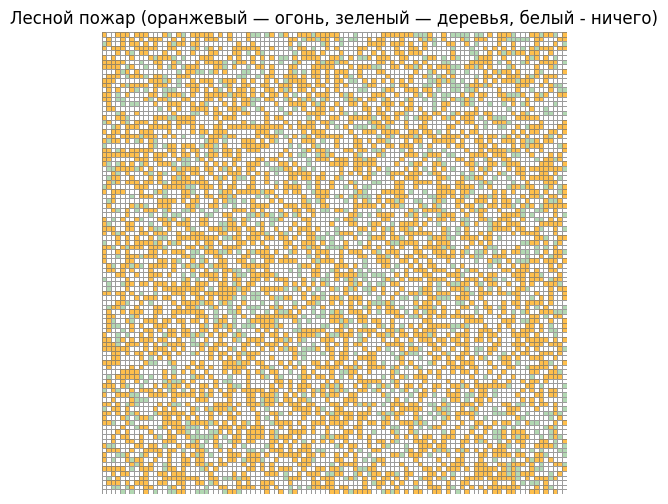

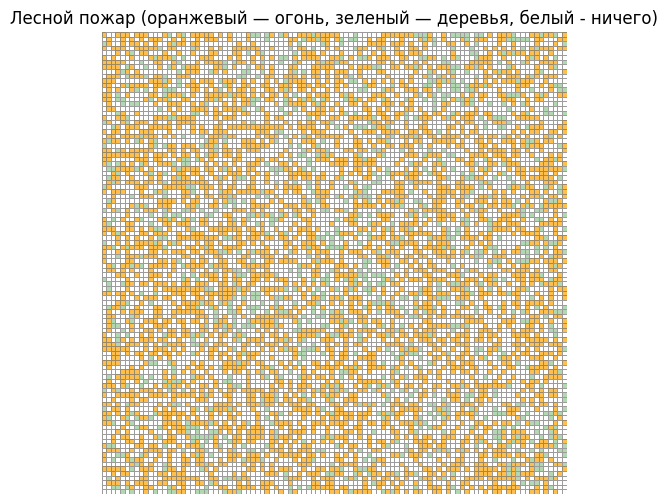

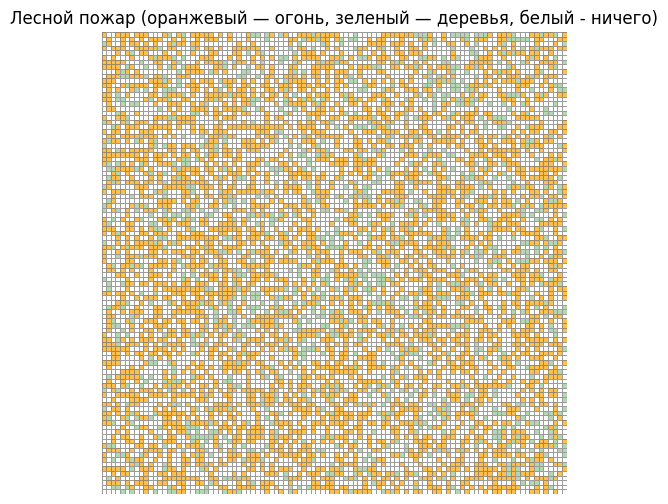

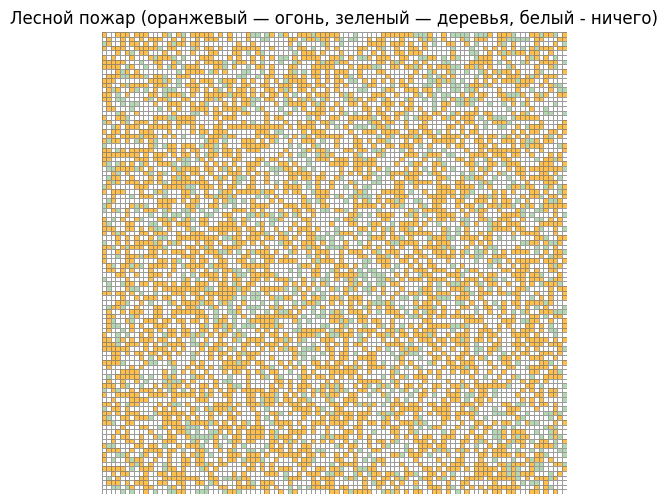

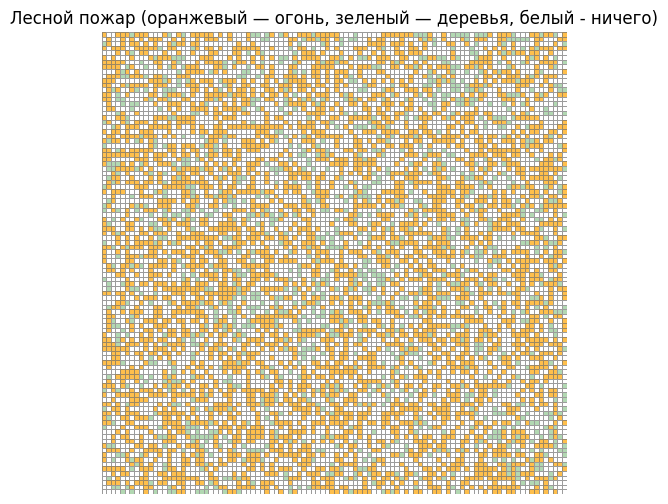

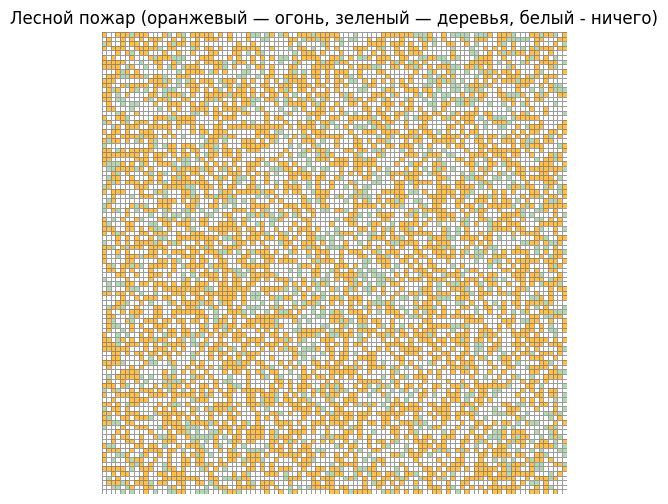

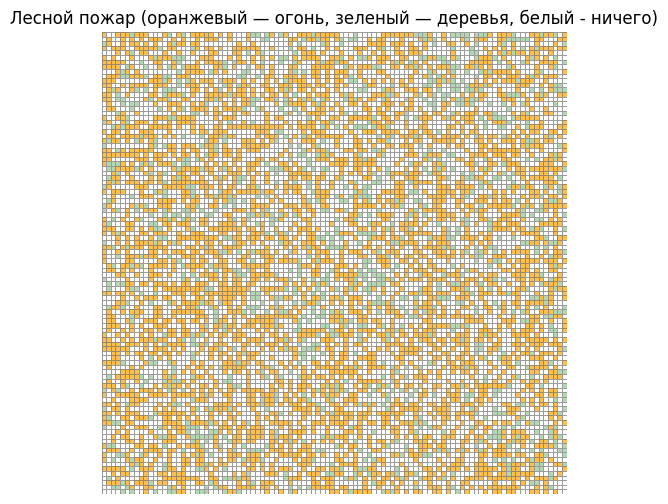

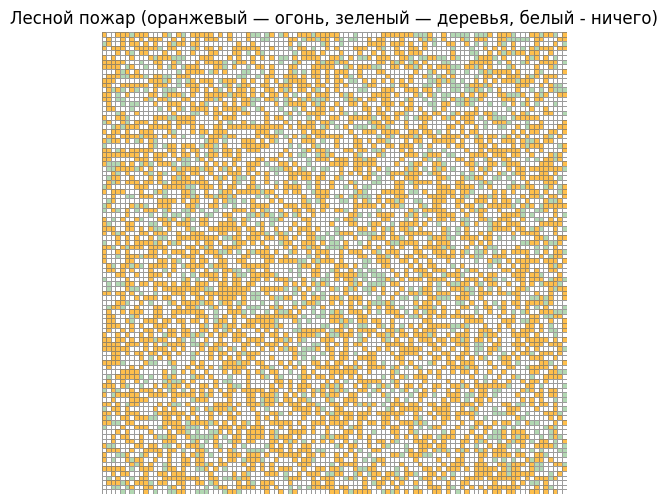

In [34]:
# симуляция с картинками
forest, fire_sizes, green_tree_counts = simulate_fire(size, tree_growth_prob, steps, visualize_forest_need=True)

In [35]:
print("Итоговое состояние леса (1 - дерево, 2 - горит):")
print(forest)
print("Размеры пожаров:", fire_sizes)
print("Максимальный пожар:", max(fire_sizes))
print("Прирост леса:", green_tree_counts)

Итоговое состояние леса (1 - дерево, 2 - горит):
[[2 0 0 ... 1 0 2]
 [0 2 0 ... 0 2 2]
 [1 2 0 ... 2 0 1]
 ...
 [0 2 2 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 2 0 0]]
Размеры пожаров: [1, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 2, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 2, 4, 1, 1, 2, 2, 1, 1, 1, 1, 1, 3, 2, 1, 2, 1, 1, 3, 5, 1, 2, 4, 2, 1, 3, 1, 7, 4, 2, 2, 4, 1, 4, 3, 1, 1, 3, 2, 2, 1, 2, 1, 1, 4, 1, 5, 3, 4, 4, 7, 2, 1, 1, 5, 1, 10, 3, 3, 5, 1, 2, 5, 1, 1, 9, 1, 3, 1, 3, 3, 4, 2, 2, 3, 2, 1, 1, 1, 2, 4, 8, 1, 3, 2, 4, 8, 3, 1, 4, 2, 1, 1, 2, 3, 1, 2, 1, 8, 6, 4, 3, 1, 6, 10, 5, 5, 2, 13, 2, 1, 6, 3, 2, 1, 4, 7, 2, 4, 1, 1, 1, 1, 2, 3, 5, 2, 7, 3, 1, 3, 4, 3, 3, 4, 8, 12, 2, 8, 3, 4, 4, 7, 9, 2, 7, 2, 9, 1, 3, 4, 1, 4, 4, 2, 2, 2, 2, 11, 4, 6, 2, 3, 8, 5, 8, 2, 2, 6, 13, 2, 3, 6, 2, 10, 4, 3, 10, 2, 2, 4, 1, 3, 1, 6, 9, 3, 15, 5, 5, 3, 8, 2, 2, 10, 6, 1, 1, 1, 6, 3, 4, 2, 4, 7, 1, 3, 2, 2, 2, 14, 2, 11, 1, 2, 1, 1, 4, 7, 2, 2, 1, 1, 3, 2, 31, 2, 3, 1, 2, 6, 3,

Исследовать макроскопические параметры модели лесного пожара: найти показатель
распределения размеров леса $a$ и его зависимость от параметра $p$.


**Важное уточнение**  
В условии не прописано что происходит после того как дерево, в которое ударило молния, и его соседи загорелись. Возможные исходы:
* На следующем временом шаге эти деревья сгорели и оставили пустое местто для нового леса
* Деревья продолжают гореть и а огонь распространяться, а новые деревья расти в пустых клетках (реализовано ранее).

Рассмотрим зависимость для второго варианта

Создаем датафрейм с различными значениями вероятности и полученными размерами пожаров

In [36]:
def run_simulations_over_probs(size, prob_values, steps, visualize_forest_need=True):
    results = []
    for prob in prob_values:
        forest, fire_sizes, green_tree_counts = simulate_fire(size, prob, steps, visualize_forest_need)

        results.append({
            'p': prob,
            'fire_size': fire_sizes,
            'grow_forest' : green_tree_counts
        })
    df = pd.DataFrame(results)
    return df

visualize_forest_need - нужна ли визуализация

In [37]:
size = 100  # размер леса
steps = 5000  # количество шагов симуляции
prob_values = np.linspace(0.1, 0.9, 16)  # p
df_fire_sizes = run_simulations_over_probs(size, prob_values, steps, False)
df_fire_sizes.head()

p                                          fire_size  \
0  0.100000  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, ...   
1  0.153333  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, ...   
2  0.206667  [1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
3  0.260000  [1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
4  0.313333  [1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 4, ...   

                                         grow_forest  
0  [0, 2, 3, 4, 7, 7, 9, 10, 11, 13, 14, 14, 16, ...  
1  [0, 1, 3, 5, 6, 7, 10, 11, 13, 17, 17, 20, 20,...  
2  [1, 4, 5, 7, 9, 11, 14, 16, 17, 18, 19, 22, 24...  
3  [0, 4, 7, 8, 11, 13, 17, 21, 22, 26, 30, 35, 3...  
4  [1, 3, 7, 12, 16, 19, 23, 28, 32, 33, 39, 42, ...

Можно выдвинуть некоторые предположения про распределение роста леса с течением времени прри условии пожаров:
* Биномиальное распределение: когда рассматривается вероятность роста дерева в каждой клетке независимо.
* Нормальное распределение: если мы суммируем изменения числа деревьев за длительный период, когда происходит много мелких пожаров.
* Экспоненциальное распределение: если рассматривается рост деревьев в лесу после крупного пожара, где восстановление идёт ускоренно.Оценка параметров для экспоненциального распределения с использованием ММП:
Для экспоненциального распределения с параметром $\lambda$, функция плотности вероятности имеет вид:

$
f(x|\lambda) = \lambda e^{-\lambda x}, \, x \geq 0
$

Для оценивания $\lambda$ по данным выборки ${x_1, x_2, ..., x_n}$, метод максимального правдоподобия даёт следующую оценку:

$
\hat{\lambda} = \frac{1}{\bar{x}} = \frac{1}{\frac{1}{n}\sum_{i=1}^{n} x_i}
$

* Пуассоновский процесс: если рост деревьев на свободных участках происходит равномерно и независимо с течением времени.

Возьмем код из лабораторной работы 2 (с клубами) и построим графики леса

In [38]:
target_p_values = [0.2, 0.5, 0.7, 0.9]
nearest_p_values = []

# Поиск ближайших значений p в df_fire_sizes
for target_p in target_p_values:
    differences = np.abs(df_fire_sizes['p'] - target_p)
    nearest_index = differences.argmin()  # индекс ближайшего значения
    nearest_p_values.append(df_fire_sizes.loc[nearest_index, 'p'])

# Вывод ближайших значений p
print("Ближайшие значения p:", nearest_p_values)

# Фильтрация DataFrame по ближайшим значениям p
filtered_df = df_fire_sizes[df_fire_sizes['p'].isin(nearest_p_values)]

Ближайшие значения p: [0.20666666666666667, 0.4733333333333334, 0.6866666666666666, 0.9]


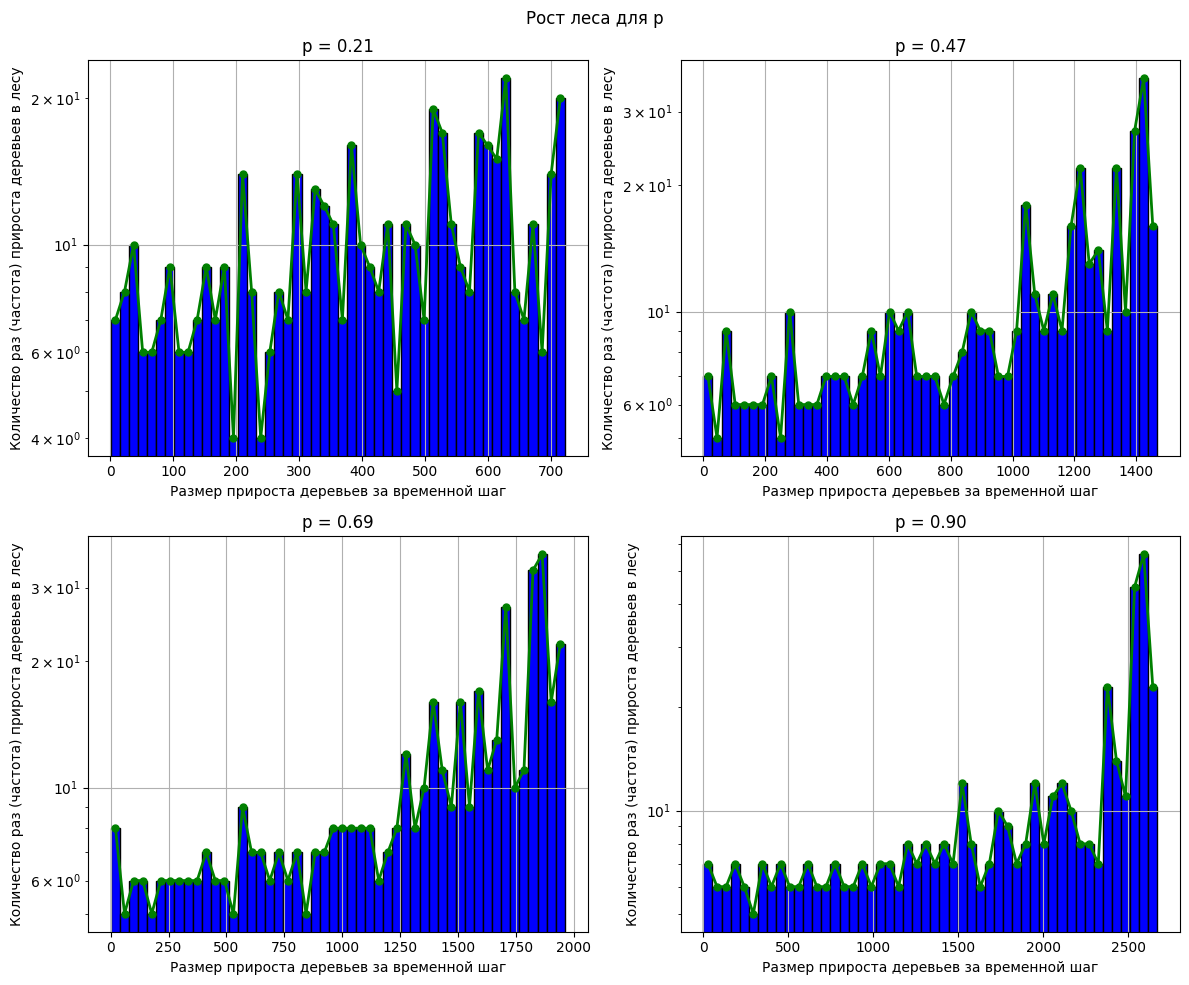

In [39]:
# Подготовка подграфиков для визуализации
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Рост леса для p')

# Гистограмма для каждого найденного значения p
for i, (index, row) in enumerate(filtered_df.iterrows()):
    p = row['p']  # значение p
    sizes = row['grow_forest']  # массив роста количества деревьев (может быть заменен на нужный столбец)
    ax = axes[i // 2, i % 2]

    # Гистограмма с логарифмической шкалой
    counts, bin_edges, _ = ax.hist(sizes, bins=50, color='blue', edgecolor='black', log=True)

    # Центры бин
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    # Исключаем столбцы с нулевой высотой
    non_zero_mask = counts > 0
    bin_centers_filtered = bin_centers[non_zero_mask]
    counts_filtered = counts[non_zero_mask]

    # Отрисовка типа апроксимирующей линии
    ax.plot(bin_centers_filtered, counts_filtered, color='green', marker='o', linestyle='-', linewidth=2, markersize=5)

    # Настройки графика
    ax.set_title(f'p = {p:.2f}')
    ax.set_xlabel('Размер прироста деревьев за временной шаг')
    ax.set_ylabel('Количество раз (частота) прироста деревьев в лесу')
    ax.grid(True)

# Настройка отображения подграфиков
plt.tight_layout()
plt.show()


Построим графики для визуальной оценки

In [40]:
import matplotlib.pyplot as plt
from scipy.stats import chisquare
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon, norm, binom

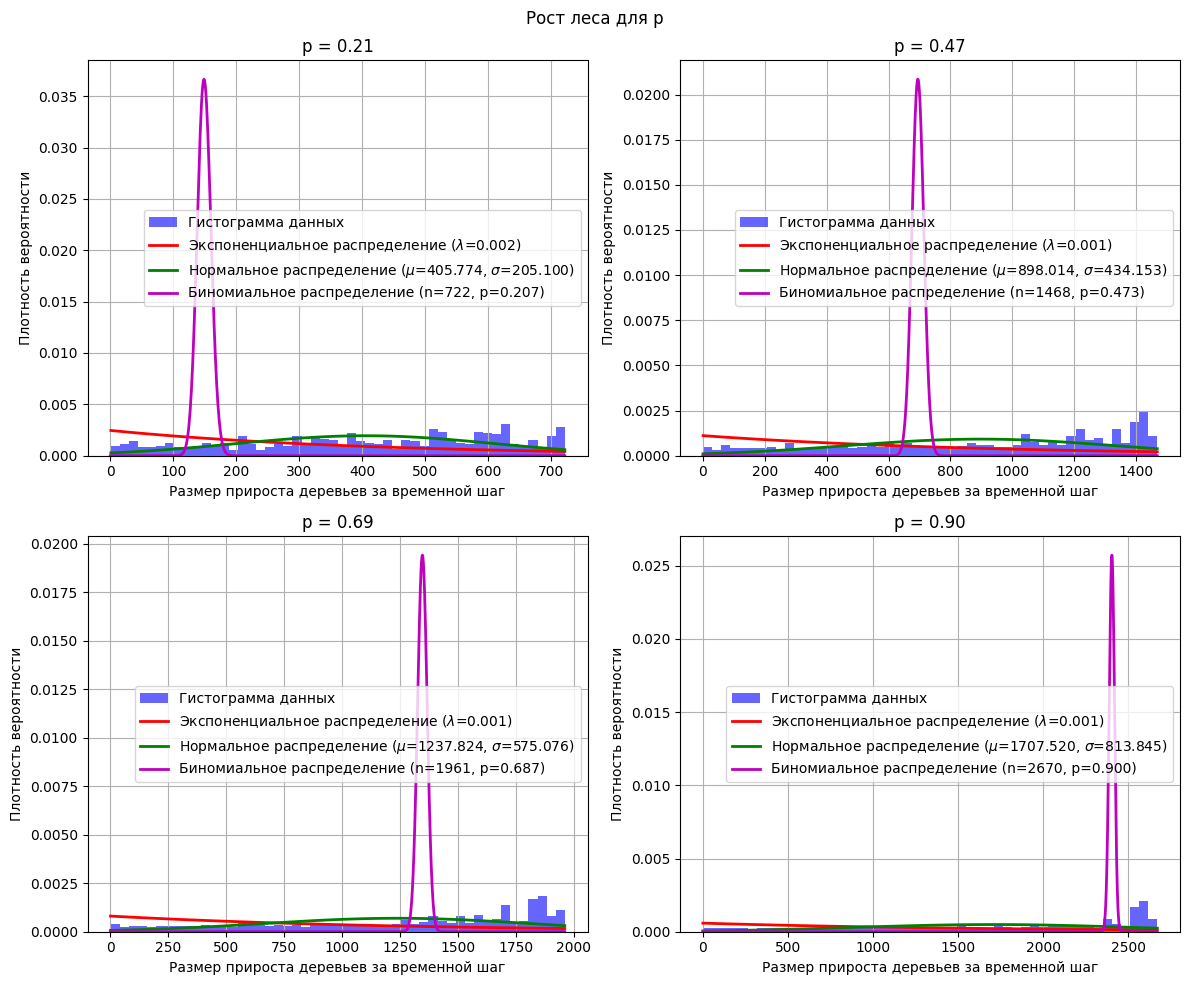

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Рост леса для p')
# Гистограмма для каждого найденного значения p
for i, (index, row) in enumerate(filtered_df.iterrows()):
    p = row['p']  # значение p
    sizes = row['grow_forest']  # массив роста количества деревьев
    ax = axes[i // 2, i % 2]
    ax.hist(sizes, bins=50, density=True, alpha=0.6, color='blue', label='Гистограмма данных')

    # Аппроксимация экспоненциальным распределением
    lambda_param = 1 / np.mean(sizes)
    x_exp = np.linspace(min(sizes), max(sizes), 100)
    ax.plot(x_exp, expon.pdf(x_exp, scale=1/lambda_param), 'r-', lw=2, label=f'Экспоненциальное распределение ($\lambda$={lambda_param:.3f})')

    # аппроксимация нормальным распределением
    mu, std = norm.fit(sizes)
    x_norm = np.linspace(min(sizes), max(sizes), 100)
    ax.plot(x_norm, norm.pdf(x_norm, mu, std), 'g-', lw=2, label=f'Нормальное распределение ($\mu$={mu:.3f}, $\sigma$={std:.3f})')

    # аппроксимация биномиальным распределением
    n = max(sizes) # максимальное количество деревьев
    prob = p
    #prob = np.mean(sizes)/n # среднее количество деревьев деленное на макс кол-во
    x_binom = np.arange(0,n+1)
    ax.plot(x_binom, binom.pmf(x_binom, n, prob), 'm-', lw=2, label=f'Биномиальное распределение (n={n}, p={prob:.3f})')
    ax.set_title(f'p = {p:.2f}')
    ax.set_xlabel('Размер прироста деревьев за временной шаг')
    ax.set_ylabel('Плотность вероятности')
    ax.legend()
    ax.grid(True)
plt.tight_layout()
plt.show()


Зависимость параметров нормального распределения от $p$

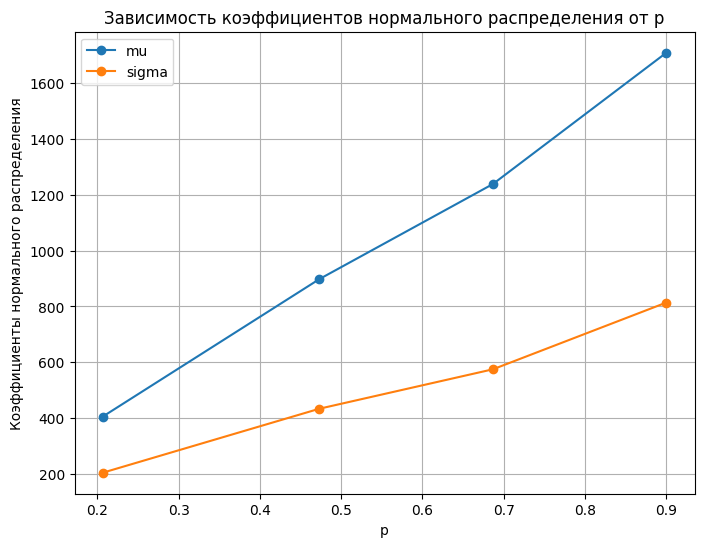

In [43]:
mu_values = []
sigma_values = []
for i, (index, row) in enumerate(filtered_df.iterrows()):
    p = row['p']
    sizes = row['grow_forest']
    mu, sigma = norm.fit(sizes)
    mu_values.append(mu)
    sigma_values.append(sigma)
plt.figure(figsize=(8, 6))
plt.plot(filtered_df['p'], mu_values, label='mu', marker='o')
plt.plot(filtered_df['p'], sigma_values, label='sigma', marker='o')
plt.xlabel('p')
plt.ylabel('Коэффициенты нормального распределения')
plt.title('Зависимость коэффициентов нормального распределения от p')
plt.legend()
plt.grid(True)
plt.show()

Больше всего похоже на Нормальное распределение, можно выполнить более жесткую проверку, однако изза расхождения эмпирических данных с теоретическими может получится нулевое значения критерия.

Также следует учитывать что при следовании условию 2 имеет значение количество пройденного времени (можно постраться увелить количество временных шагов).

Жесткая проверка

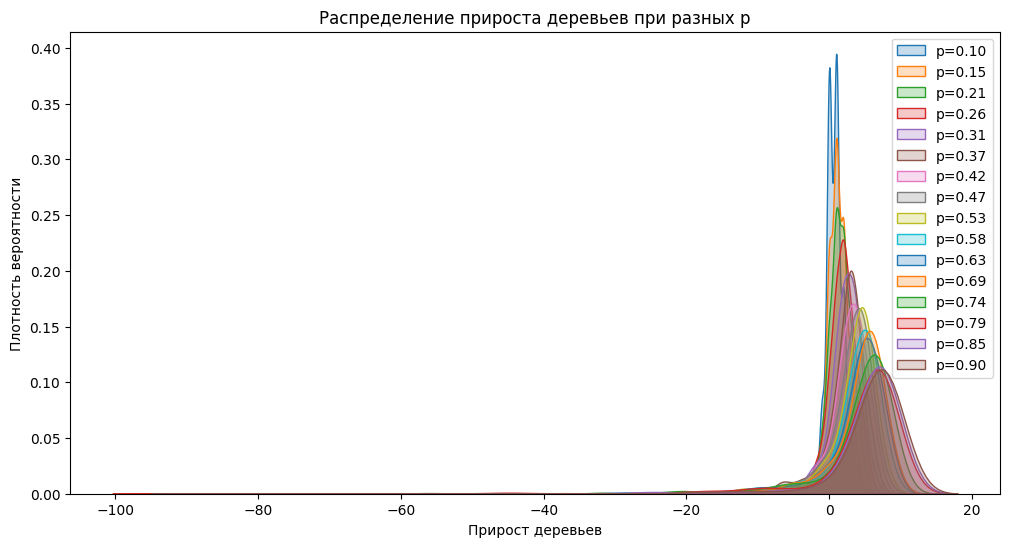


--- p=0.10 ---
Нормальное: μ=0.78, σ=1.22, Проверка=Нет
Пуассон: λ=0.78, Проверка=Нет
Экспоненциальное: λ=1.28, Проверка=Нет
Статистики: poisson_ks_p=0.00, exp_ks_p=0.00, shapiro_p=0.00

--- p=0.15 ---
Нормальное: μ=1.10, σ=1.44, Проверка=Нет
Пуассон: λ=1.10, Проверка=Нет
Экспоненциальное: λ=0.91, Проверка=Нет
Статистики: poisson_ks_p=0.00, exp_ks_p=0.00, shapiro_p=0.00

--- p=0.21 ---
Нормальное: μ=1.44, σ=1.66, Проверка=Нет
Пуассон: λ=1.44, Проверка=Нет
Экспоненциальное: λ=0.69, Проверка=Нет
Статистики: poisson_ks_p=0.00, exp_ks_p=0.00, shapiro_p=0.00

--- p=0.26 ---
Нормальное: μ=1.77, σ=1.98, Проверка=Нет
Пуассон: λ=1.77, Проверка=Нет
Экспоненциальное: λ=0.56, Проверка=Нет
Статистики: poisson_ks_p=0.00, exp_ks_p=0.00, shapiro_p=0.00

--- p=0.31 ---
Нормальное: μ=2.04, σ=2.61, Проверка=Нет
Пуассон: λ=2.04, Проверка=Нет
Экспоненциальное: λ=0.49, Проверка=Нет
Статистики: poisson_ks_p=0.00, exp_ks_p=0.00, shapiro_p=0.00

--- p=0.37 ---
Нормальное: μ=2.29, σ=2.79, Проверка=Нет
Пуассон:

In [44]:
df_fire_sizes['growth_rate'] = df_fire_sizes['grow_forest'].apply(lambda x: np.diff(x))
plt.figure(figsize=(12, 6))
distribution_params = {}

for idx, row in df_fire_sizes.iterrows():
    p = row['p']
    growth = row['growth_rate']
    # параметры распределений
    mean_growth = np.mean(growth)
    std_growth = np.std(growth, ddof=1)  # стандартное отклонение
    lambda_poisson = mean_growth  #  λ для Пуассона
    lambda_exp = 1 / mean_growth if mean_growth > 0 else np.nan  # λ для экспоненциального
    # нормальность (Shapiro-Wilk)
    shapiro_stat, shapiro_p = stats.shapiro(growth)
    is_normal = shapiro_p > 0.05
    # Пуассон (KS-тест)
    poisson_ks_stat, poisson_ks_p = stats.kstest(growth, 'poisson', args=(lambda_poisson,))
    is_poisson = poisson_ks_p > 0.05
    # экспоненциальное распределение (KS-тест)
    exp_ks_stat, exp_ks_p = stats.kstest(growth, 'expon', args=(0, 1 / lambda_exp))
    is_exponential = exp_ks_p > 0.05
    # параметры
    distribution_params[p] = {
        "Нормальное": {"μ": mean_growth, "σ": std_growth, "Проверка": "Да" if is_normal else "Нет"},
        "Пуассон": {"λ": lambda_poisson, "Проверка": "Да" if is_poisson else "Нет"},
        "Экспоненциальное": {"λ": lambda_exp, "Проверка": "Да" if is_exponential else "Нет"},
        "Статистики" : {"poisson_ks_p": poisson_ks_p, "exp_ks_p": exp_ks_p, "shapiro_p": shapiro_p}
    }

    sns.kdeplot(growth, label=f"p={p:.2f}", fill=True)
plt.xlabel("Прирост деревьев")
plt.ylabel("Плотность вероятности")
plt.title("Распределение прироста деревьев при разных p")
plt.legend()
plt.show()
for p, params in distribution_params.items():
    print(f"\n--- p={p:.2f} ---")
    for dist, values in params.items():
        param_str = ", ".join([f"{k}={v:.2f}" if isinstance(v, float) else f"{k}={v}" for k, v in values.items()])
        print(f"{dist}: {param_str}")

* Скорее всего данные распределены близко к нормальному (при условии 2) с достаточно большими коэффициентами сдвига и масштаба.

В последстивии код блокнота был перезапущен не с 5000 временными шагами, а с 1500. Распределение при $p$ < 0.69 напоминает нормальное.